# <center><i>Santander Customer Transaction Prediction</i></center>

In [311]:
#importing libraries
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score,precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
%matplotlib inline

In [312]:
#path for dataset
os.chdir("C://Users//Shubh Gupta//Desktop//DataScience//Project//Santander-Customer-Transaction-Prediction")

In [313]:
#loading the train and test data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [314]:
#exploring train data
train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [315]:
#describing the train data
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [316]:
#shape of train data
train.shape

(200000, 202)

In [317]:
#exploring the test data
test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [318]:
#describing the test data
test.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

In [319]:
#shape of test data
test.shape

(200000, 201)

In [320]:
#storing ID_code of both train and test data into another variable
train_ID_code=train.ID_code
test_ID_code=test.ID_code

In [321]:
train_ID_code.shape

(200000,)

In [322]:
test_ID_code.shape

(200000,)

In [323]:
#dropping ID_code from both train and test data
train.drop(columns="ID_code",inplace=True)
test.drop(columns="ID_code",inplace=True)

In [324]:
#shape of train data after dropping ID_code
train.shape

(200000, 201)

In [325]:
#shape of test data after dropping ID_code
test.shape

(200000, 200)

# Distribution of Target Variable

## <i>Bar Graph</i>

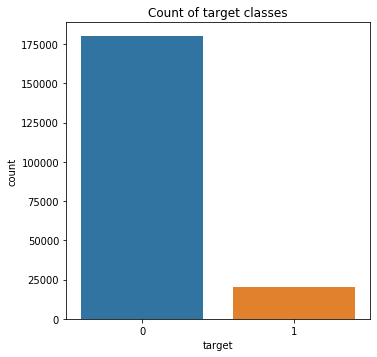

In [326]:
#generating the bar graph for both the classes of target variable
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.title("Count of target classes")
sns.countplot(train.target)

## <i>Pie Chart</i>

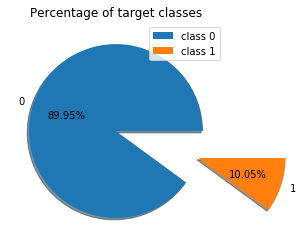

In [327]:
#generating the pie chart for both the classes of target variable
plt.pie(train.target.value_counts() , labels=[0,1] ,autopct='%1.2f%%' ,explode=(0,1) , shadow=True)
plt.legend(['class 0','class 1'])
plt.title("Percentage of target classes")
plt.show()

# Observations

<i>
1. The dataset is highly imbalanced.<br/>
2. The number of data points in class 0 is approximately 90%.<br/>
3. The number of data points in class 1 is approximately 10%.<br/>
4. The number of people that will make transactions are very less as compared to those who will not make.
</i>

# Missing Value Analysis

In [328]:
#missing values for training dataset
missing_value_train=pd.DataFrame(train.isnull().sum()).rename(columns={0:'count'})
missing_value_train.head(10)

count
target      0
var_0       0
var_1       0
var_2       0
var_3       0
var_4       0
var_5       0
var_6       0
var_7       0
var_8       0

In [329]:
#missing values for test dataset
missing_value_test=pd.DataFrame(test.isnull().sum()).rename(columns={0:'count'})
missing_value_test.head(10)

count
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0

# Observation

<i>No missing values in both the train and test datasets.</i>

# Splitting the train data into dependent and independent variables

In [330]:
#dividing the training dataset into dependent and independent variables
independent_var = [i for i in train.columns.values if i!='target']
X=train[independent_var]
Y=train.target

In [331]:
X.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 200 columns]

In [332]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# Multicollinearity Analysis

In [333]:
#function to calculate VIF(Variance Inflation Factor)
#VIF = 1/(1-R^2)
def calulate_vif(df,column_name):
    vif_score ={}
    for i in range(0 , df.shape[1]):
        print(i,end="\n")
        Y =df.loc[: , df.columns==column_name[i]]
        X =df.drop(columns=column_name[i])
        model =LinearRegression().fit(X,Y)
        rsq=model.score(X,Y)
        vif =round(((1)/(1-rsq)) ,2)
        print("VIF Score:",vif,end="\n")
        vif_score[independent_var[i]]=vif   
    return vif_score

In [334]:
#calculating VIF 
vif_dict=calulate_vif(X,independent_var)

0
VIF Score: 1.0
1
VIF Score: 1.0
2
VIF Score: 1.0
3
VIF Score: 1.0
4
VIF Score: 1.0
5
VIF Score: 1.0
6
VIF Score: 1.0
7
VIF Score: 1.0
8
VIF Score: 1.0
9
VIF Score: 1.0
10
VIF Score: 1.0
11
VIF Score: 1.0
12
VIF Score: 1.0
13
VIF Score: 1.0
14
VIF Score: 1.0
15
VIF Score: 1.0
16
VIF Score: 1.0
17
VIF Score: 1.0
18
VIF Score: 1.0
19
VIF Score: 1.0
20
VIF Score: 1.0
21
VIF Score: 1.0
22
VIF Score: 1.0
23
VIF Score: 1.0
24
VIF Score: 1.0
25
VIF Score: 1.0
26
VIF Score: 1.0
27
VIF Score: 1.0
28
VIF Score: 1.0
29
VIF Score: 1.0
30
VIF Score: 1.0
31
VIF Score: 1.0
32
VIF Score: 1.0
33
VIF Score: 1.0
34
VIF Score: 1.0
35
VIF Score: 1.0
36
VIF Score: 1.0
37
VIF Score: 1.0
38
VIF Score: 1.0
39
VIF Score: 1.0
40
VIF Score: 1.0
41
VIF Score: 1.0
42
VIF Score: 1.0
43
VIF Score: 1.0
44
VIF Score: 1.0
45
VIF Score: 1.0
46
VIF Score: 1.0
47
VIF Score: 1.0
48
VIF Score: 1.0
49
VIF Score: 1.0
50
VIF Score: 1.0
51
VIF Score: 1.0
52
VIF Score: 1.0
53
VIF Score: 1.0
54
VIF Score: 1.0
55
VIF Score: 1.0
56

In [335]:
#creating VIF dataframe
vif_df=pd.DataFrame(list(vif_dict.values()) ,index=list(vif_dict.keys()))
vif_df.reset_index(inplace=True)
vif_df.rename(columns={0:"vif",'index':"var"} ,inplace=True)
vif_df.head(10)

var  vif
0  var_0  1.0
1  var_1  1.0
2  var_2  1.0
3  var_3  1.0
4  var_4  1.0
5  var_5  1.0
6  var_6  1.0
7  var_7  1.0
8  var_8  1.0
9  var_9  1.0

# Observation

<i>VIF of all the variables is 1 which is acceptable according to the rule of thumb.</i>

# Distribution of Independent Variables

In [336]:
#checking the distribution of independent variables
def check_distribution(X ,start ,end):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    names =list(range(start,end))
    for i , realindex in  enumerate(names,1):
        ax = fig.add_subplot( 5,4, i)
        sns.distplot(X.iloc[:,realindex] ,ax=ax)
    plt.suptitle("Distribution plots for {0} to {1} independent variables".format(start,end-1))
    plt.show()

## <i>Distribution of train data</i>

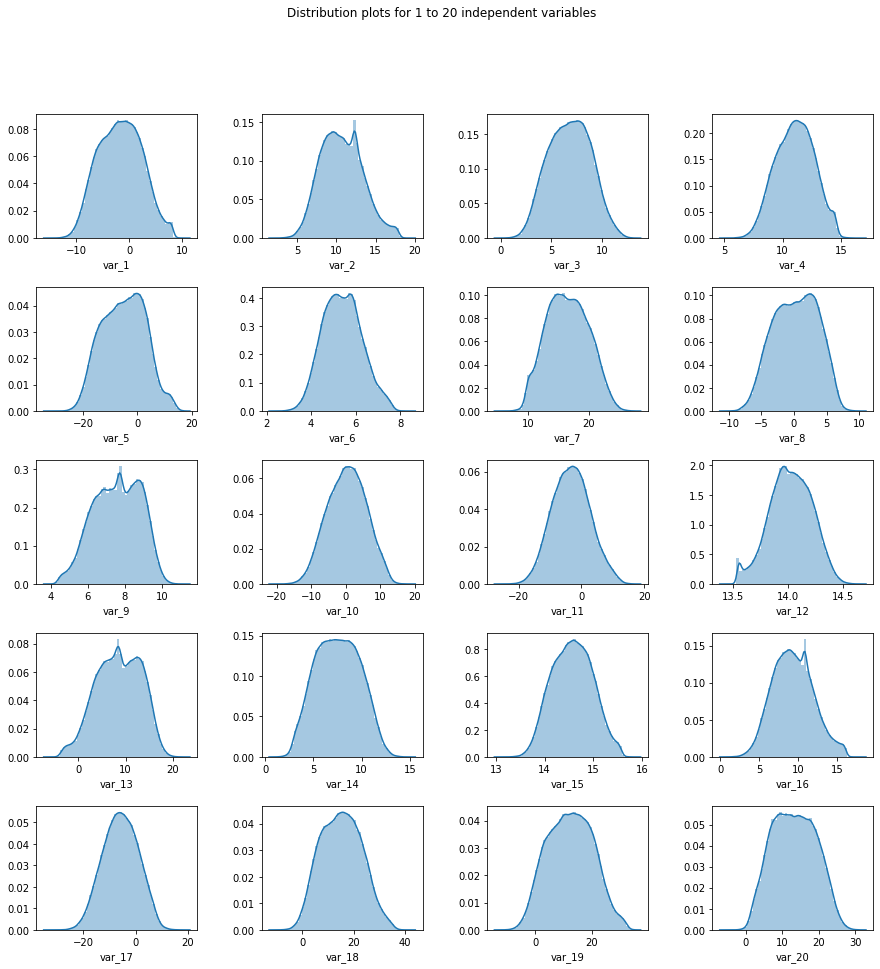

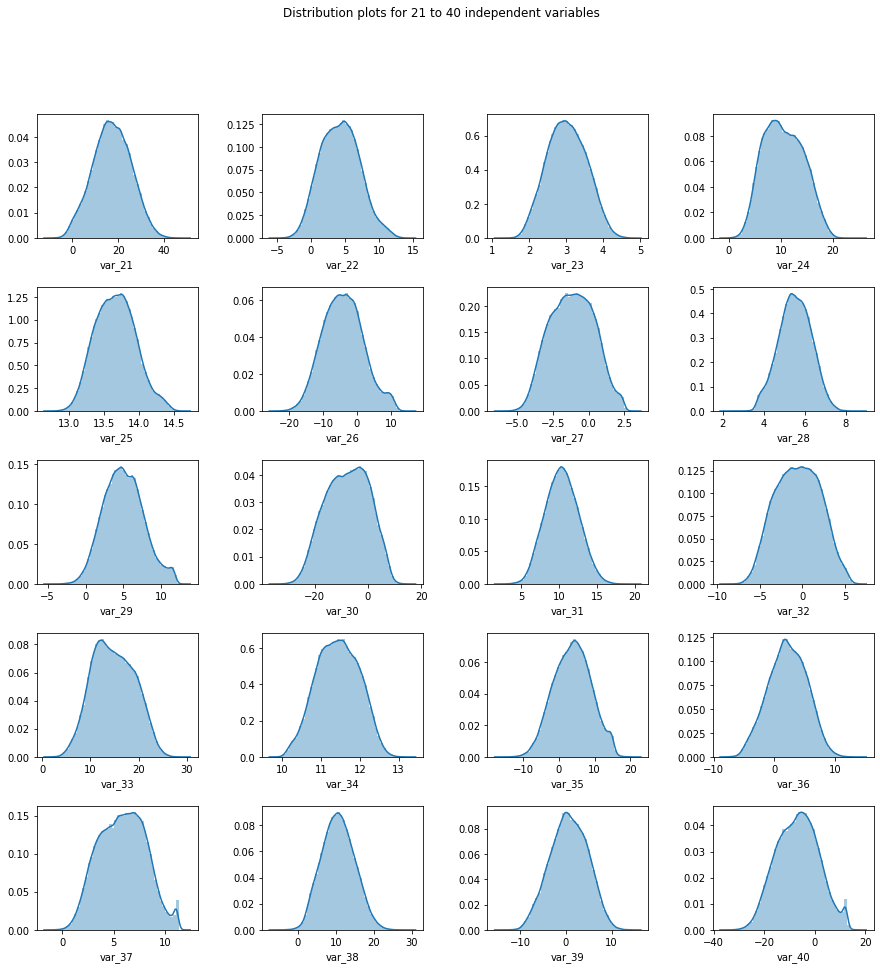

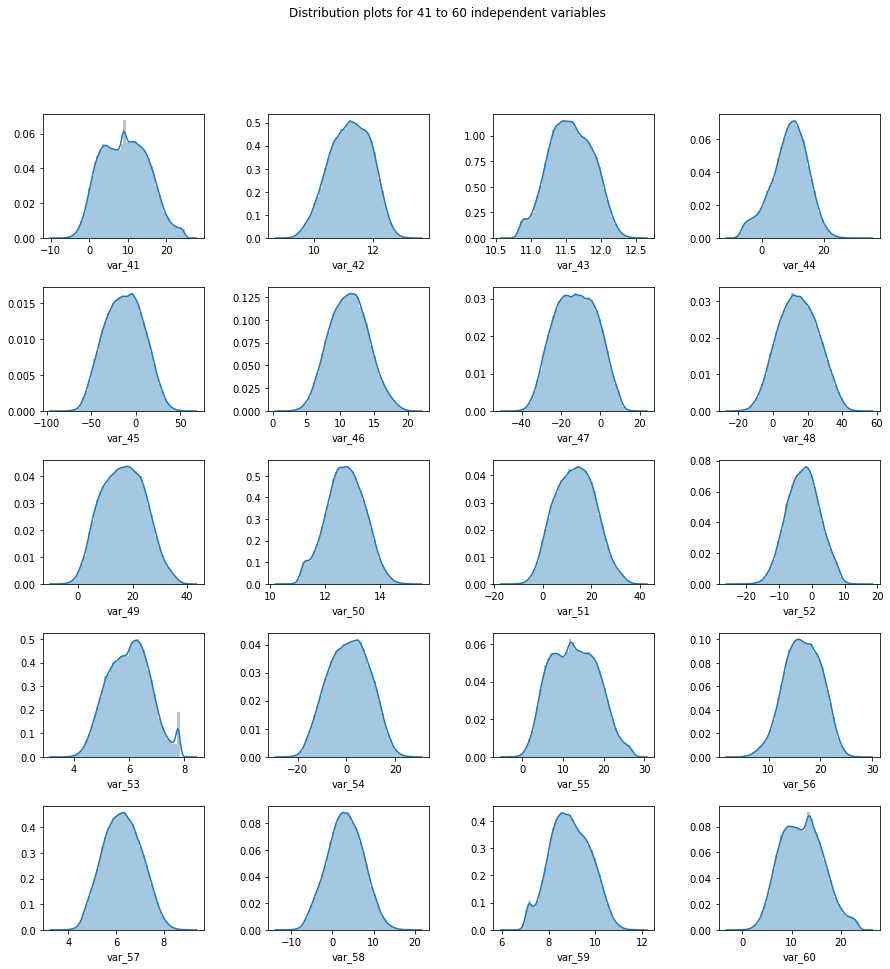

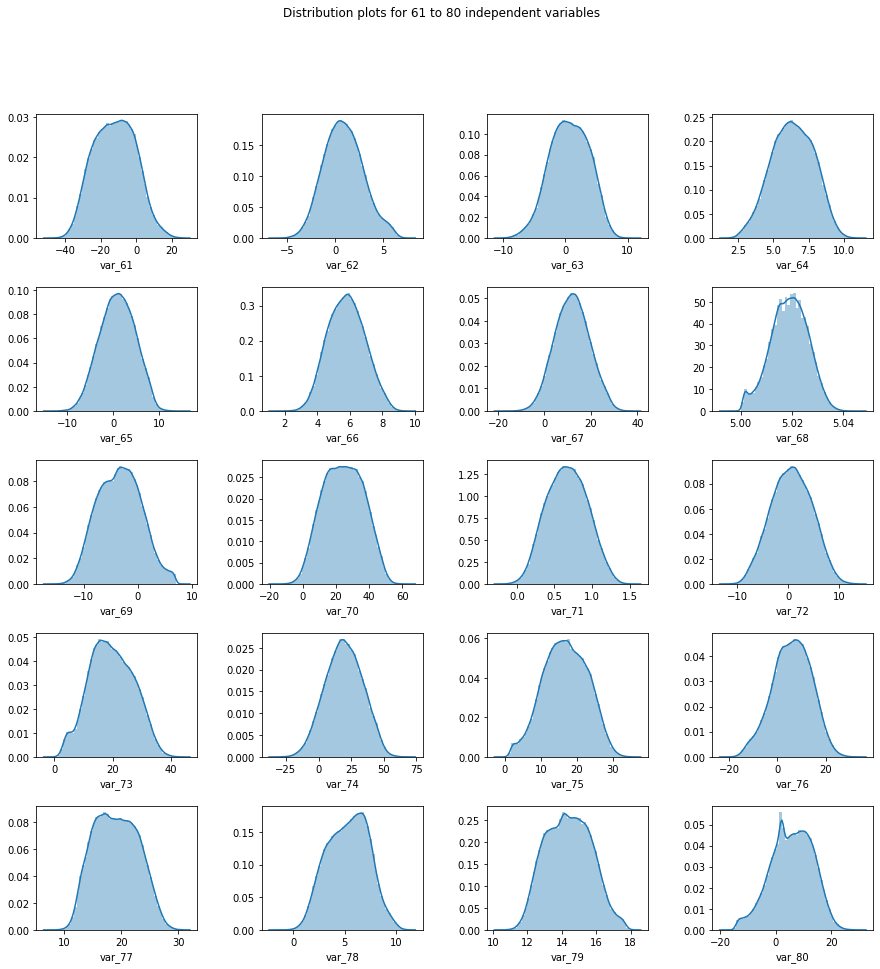

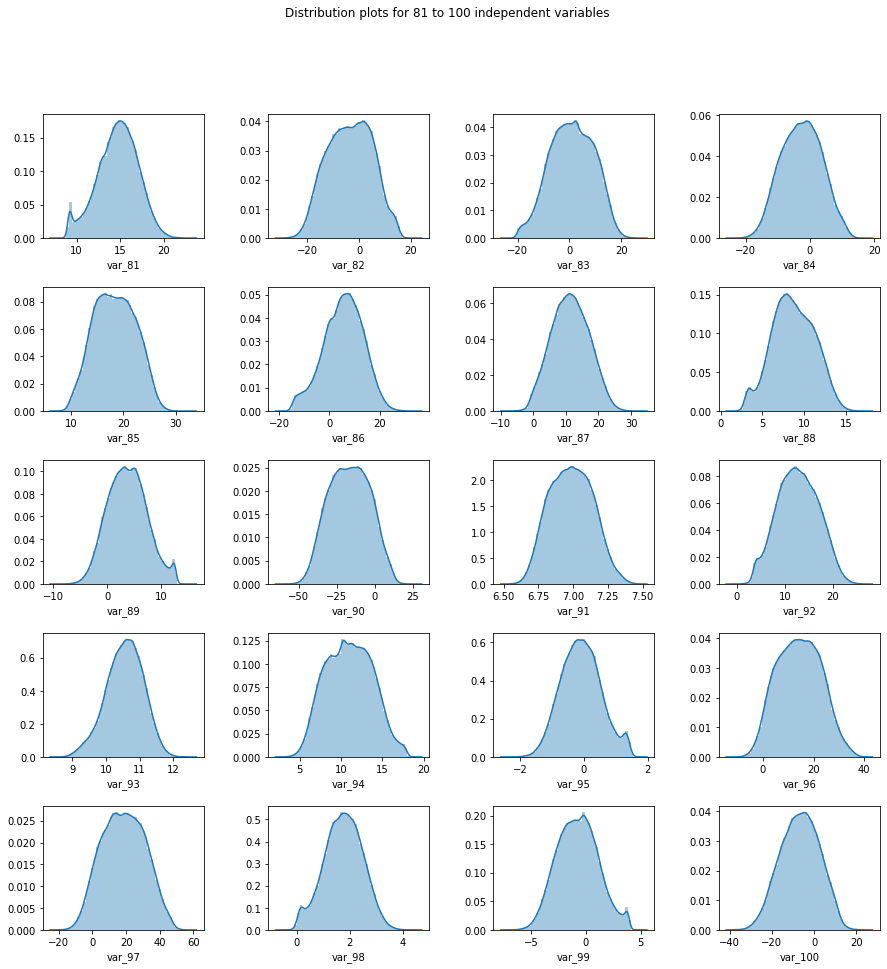

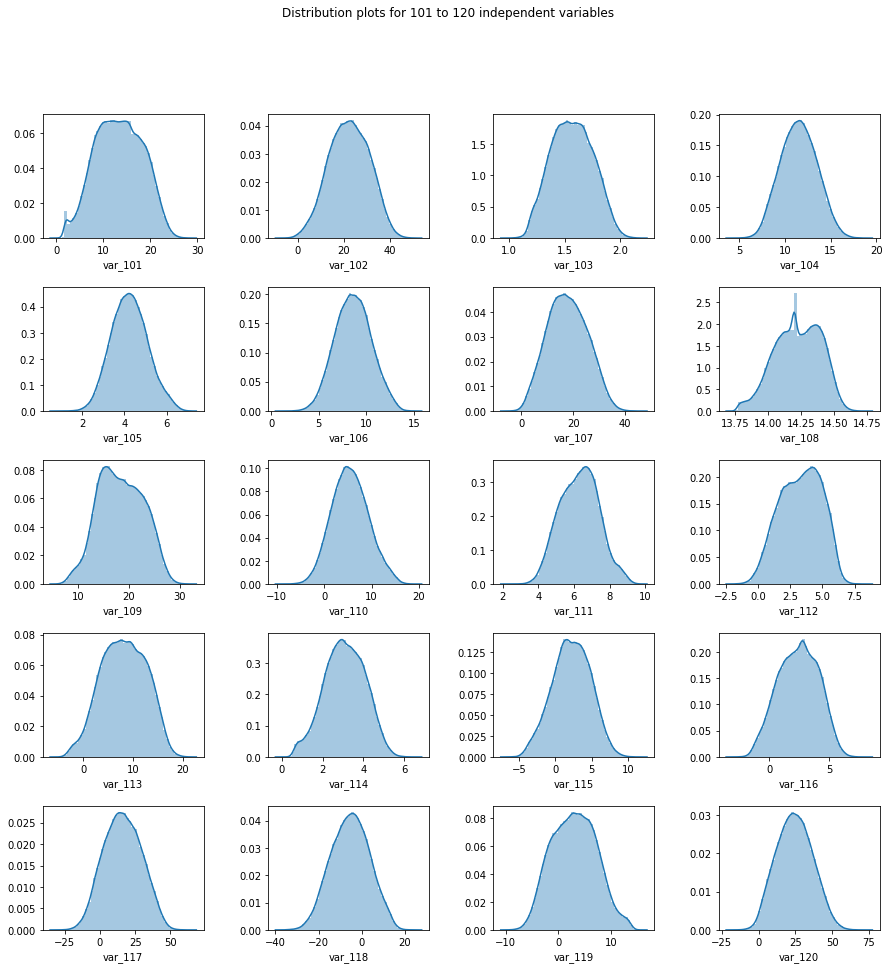

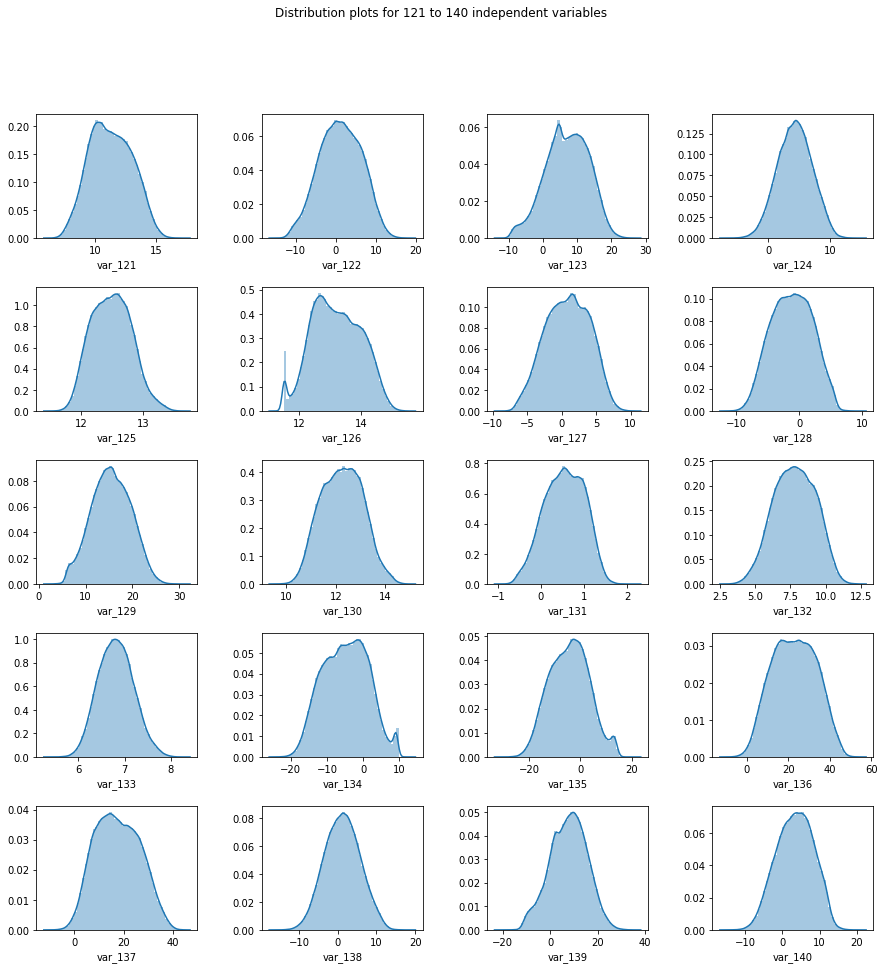

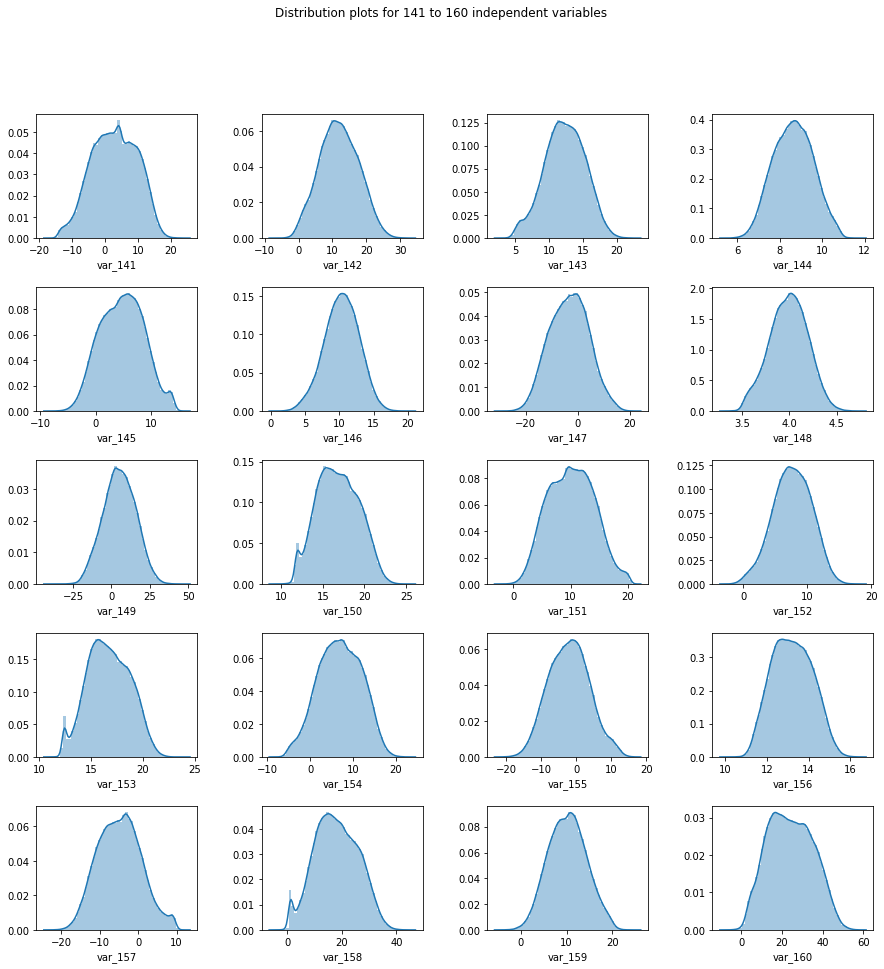

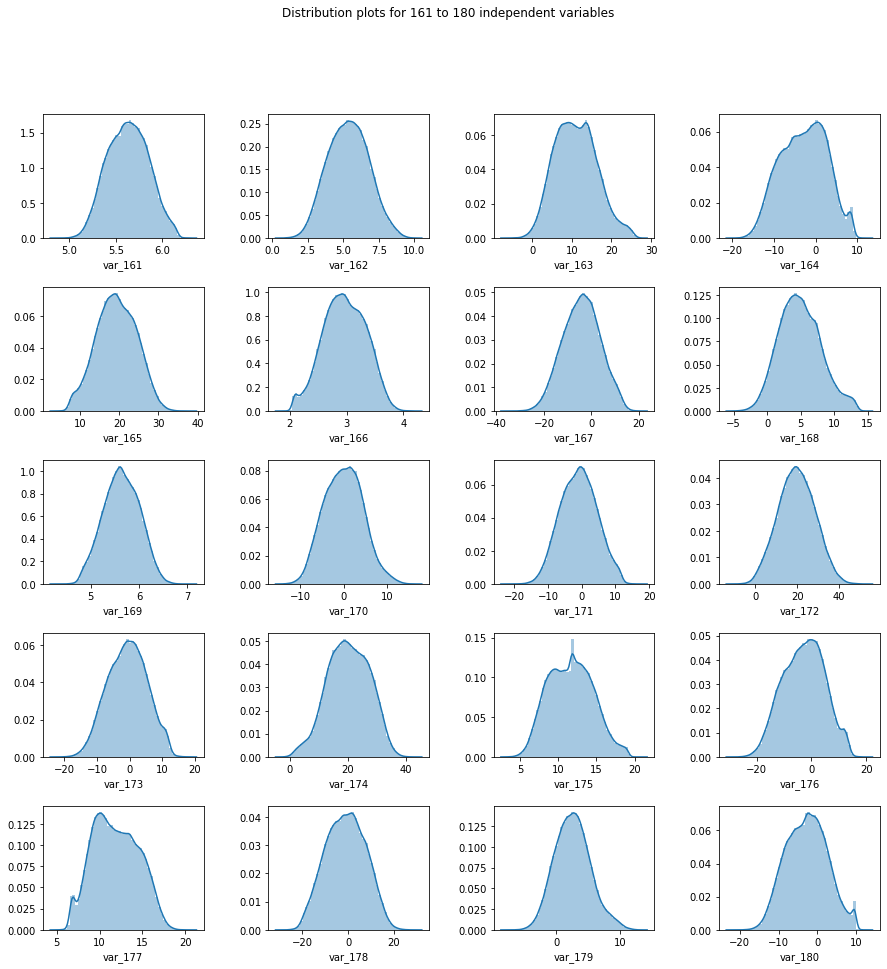

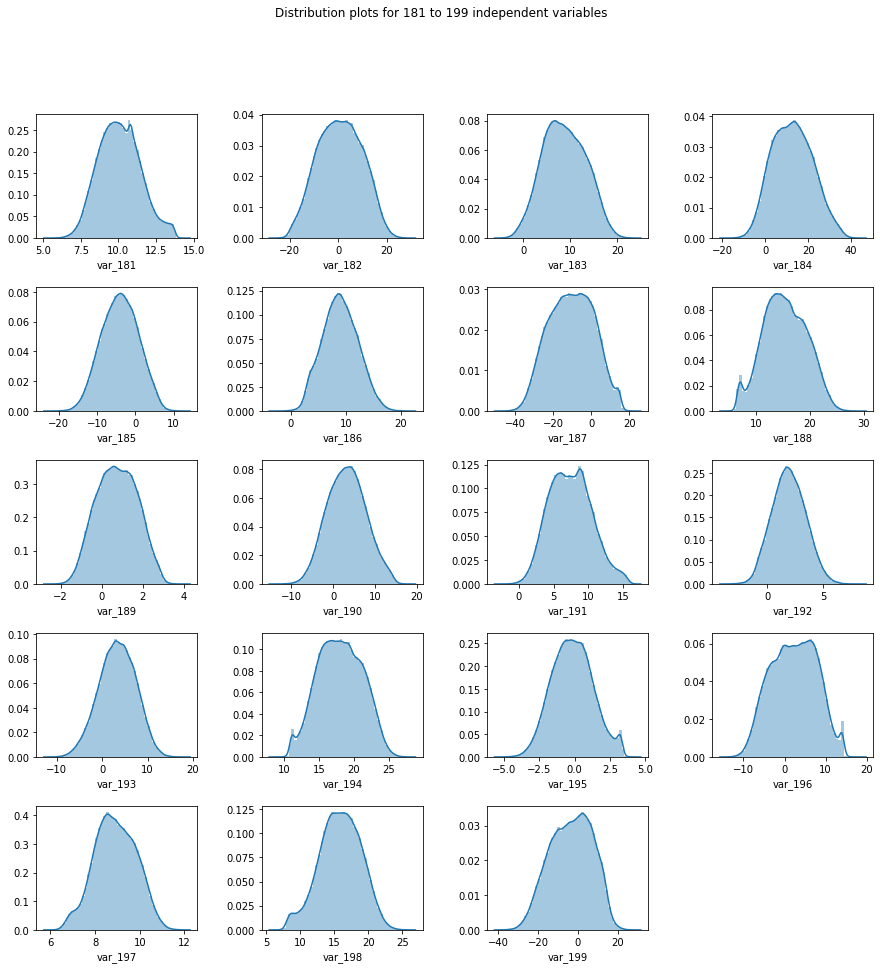

In [337]:
#distribution of train data using pair plots 
for i in range(1,199,20):
    if(i==181):
        check_distribution(X,i,i+19)
    else:
        check_distribution(X,i,i+20)

# Observation

<i>Almost all the independent variables of the train data are  normally distributed.</i>

## <i>Distribution of test data</i>

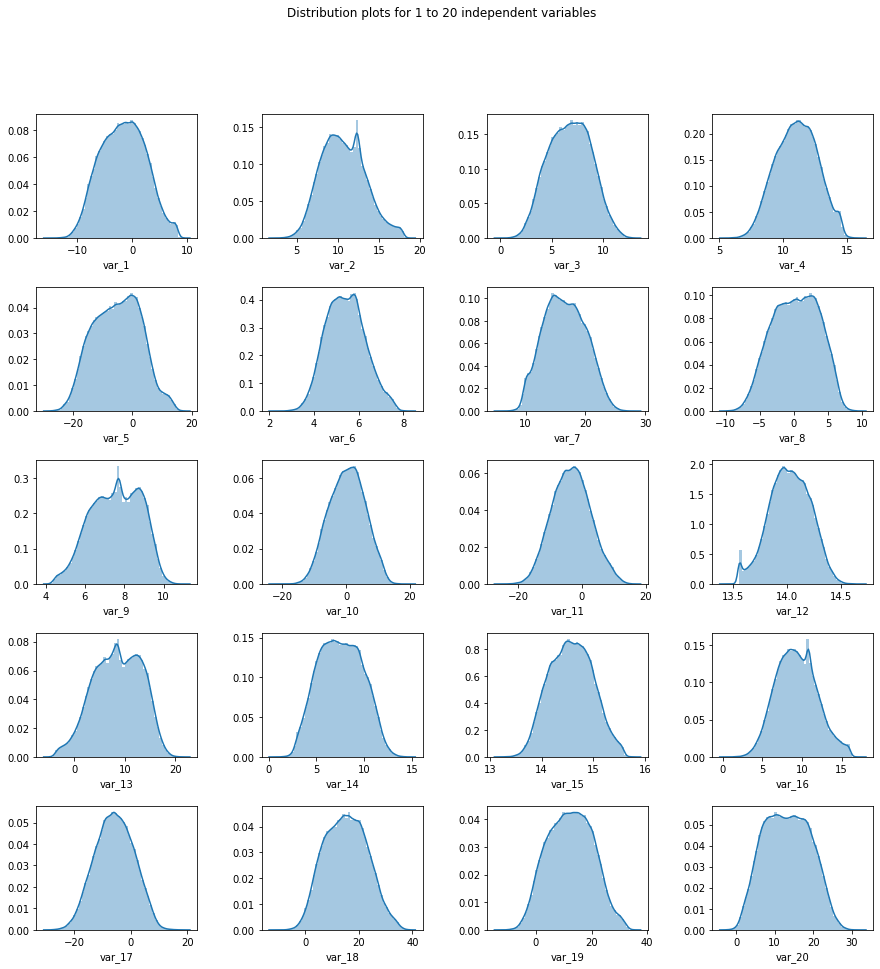

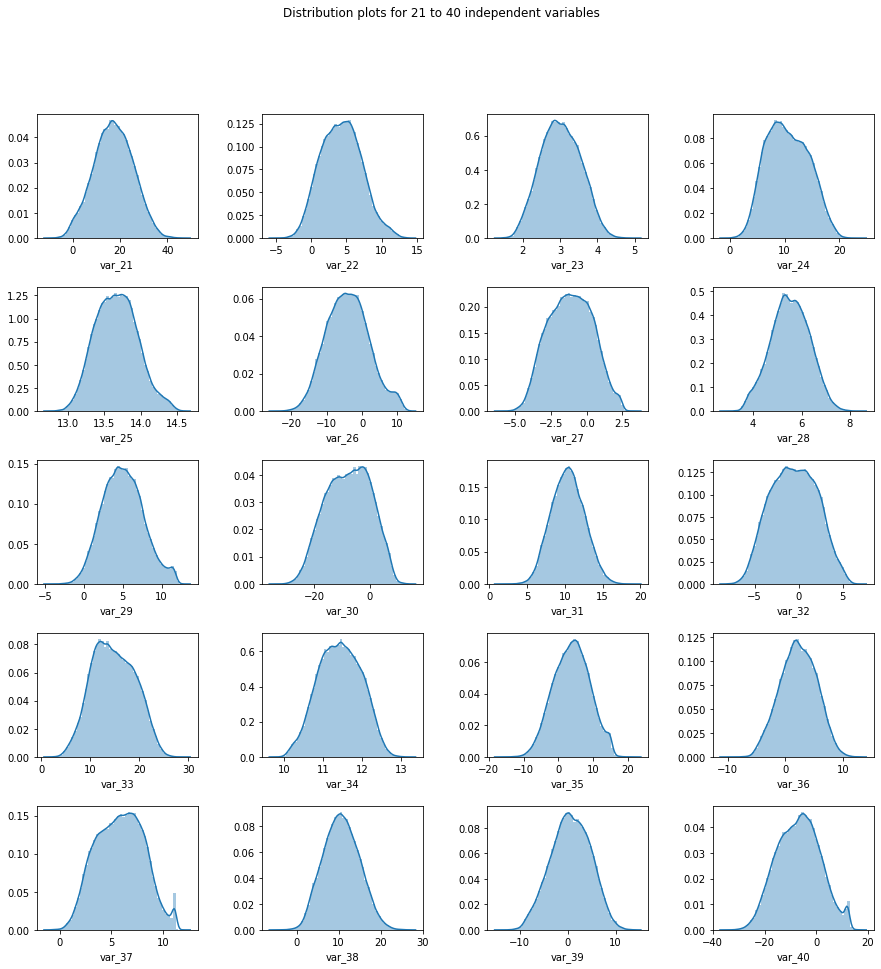

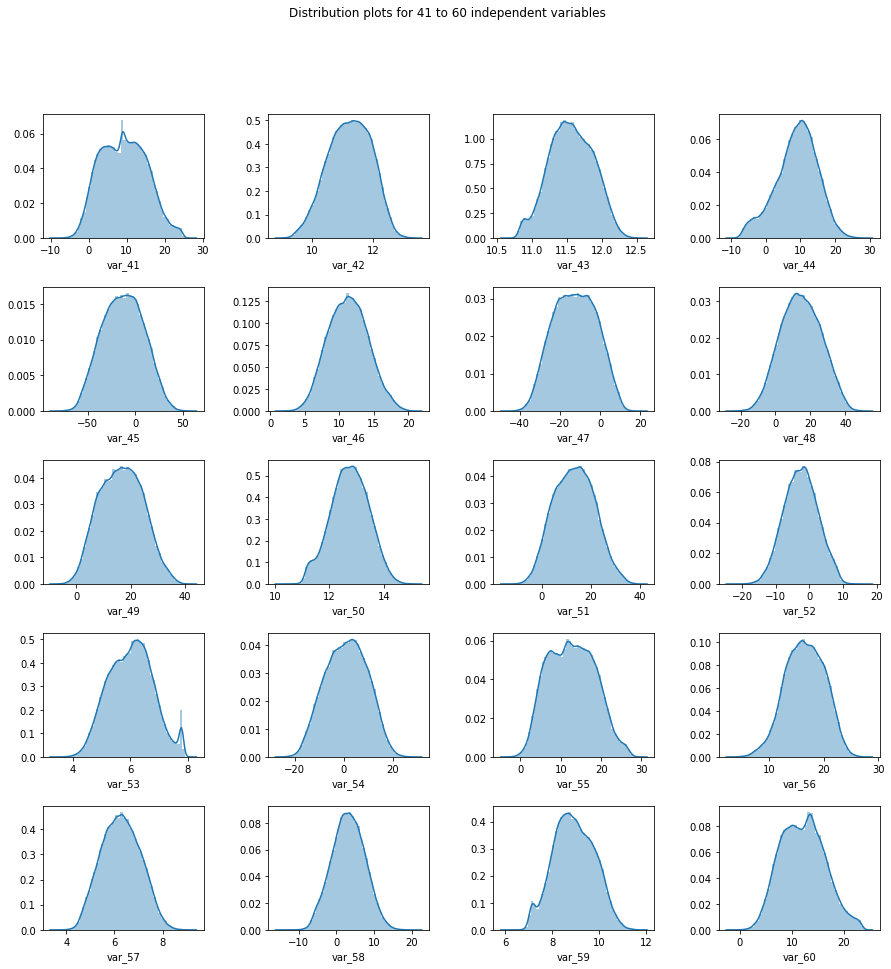

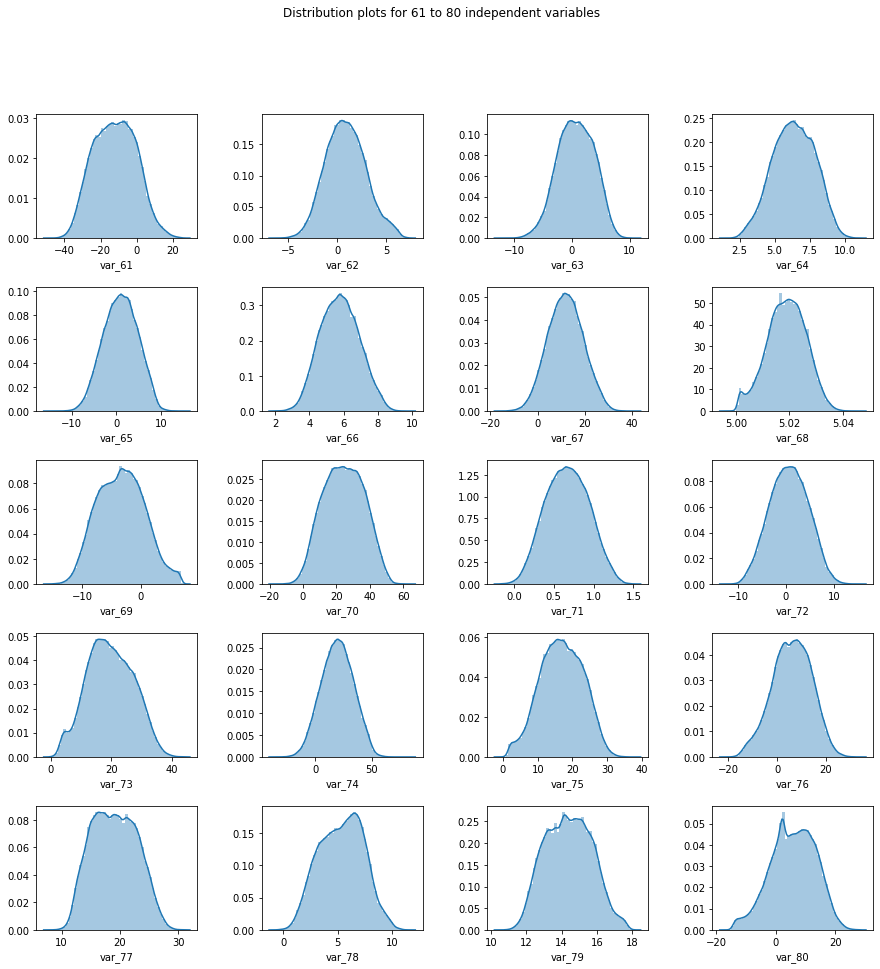

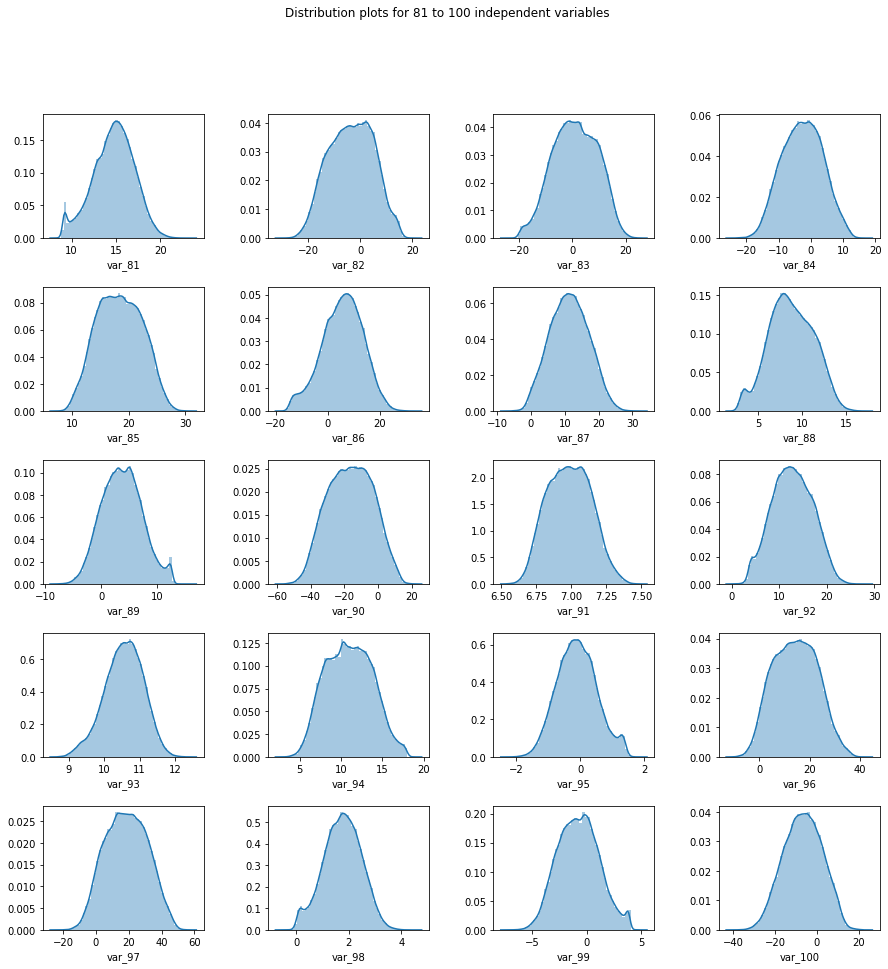

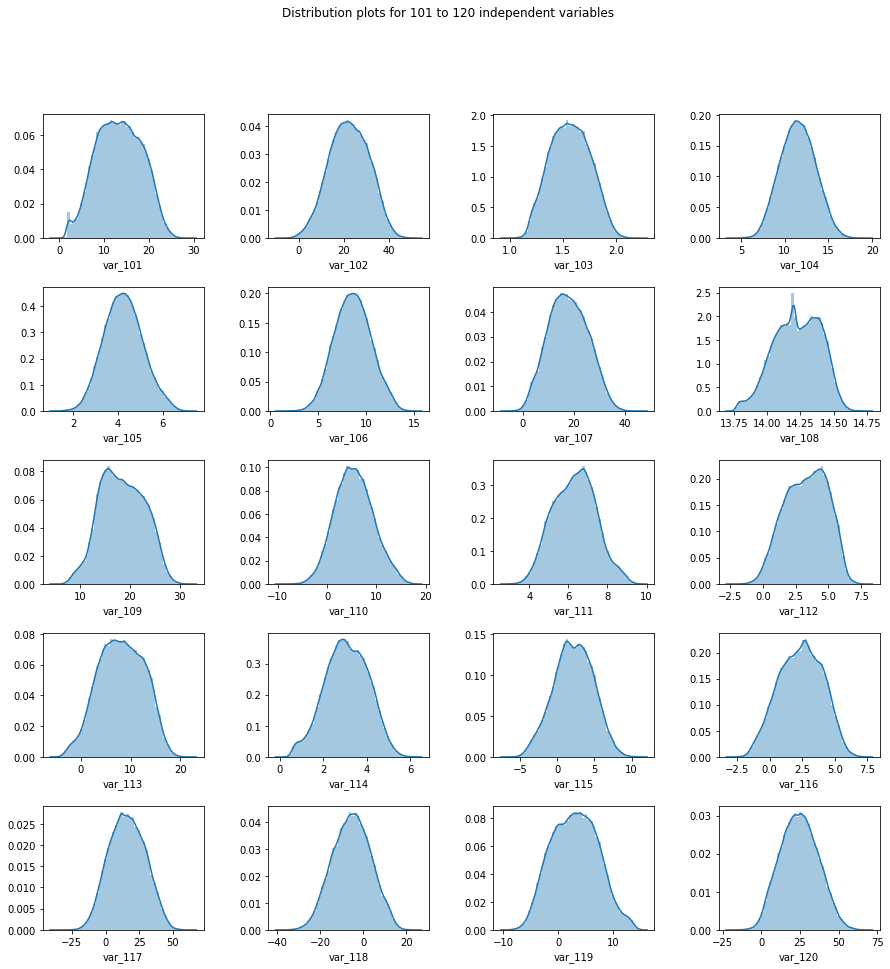

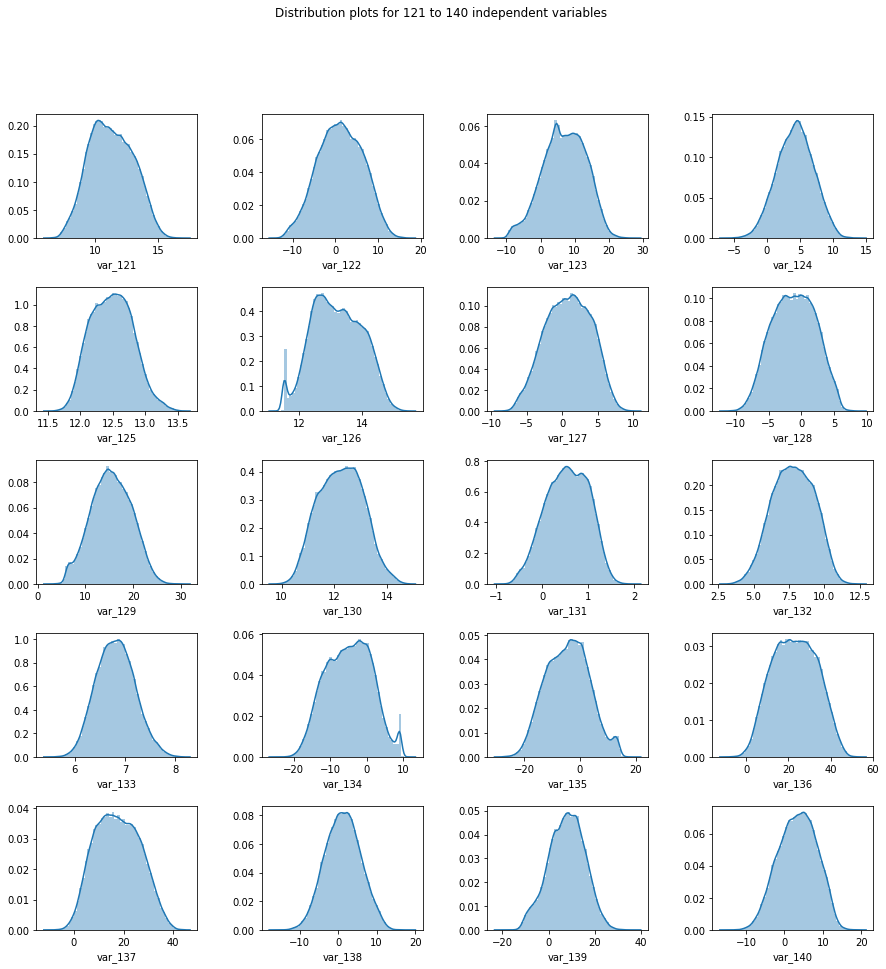

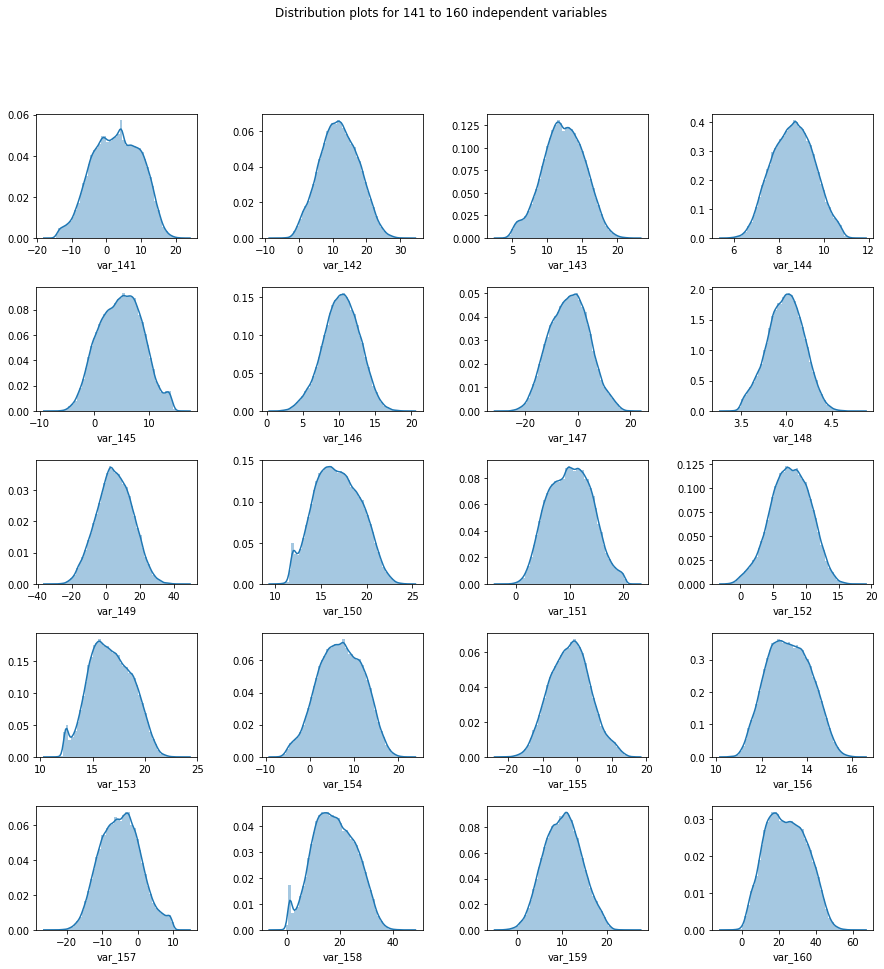

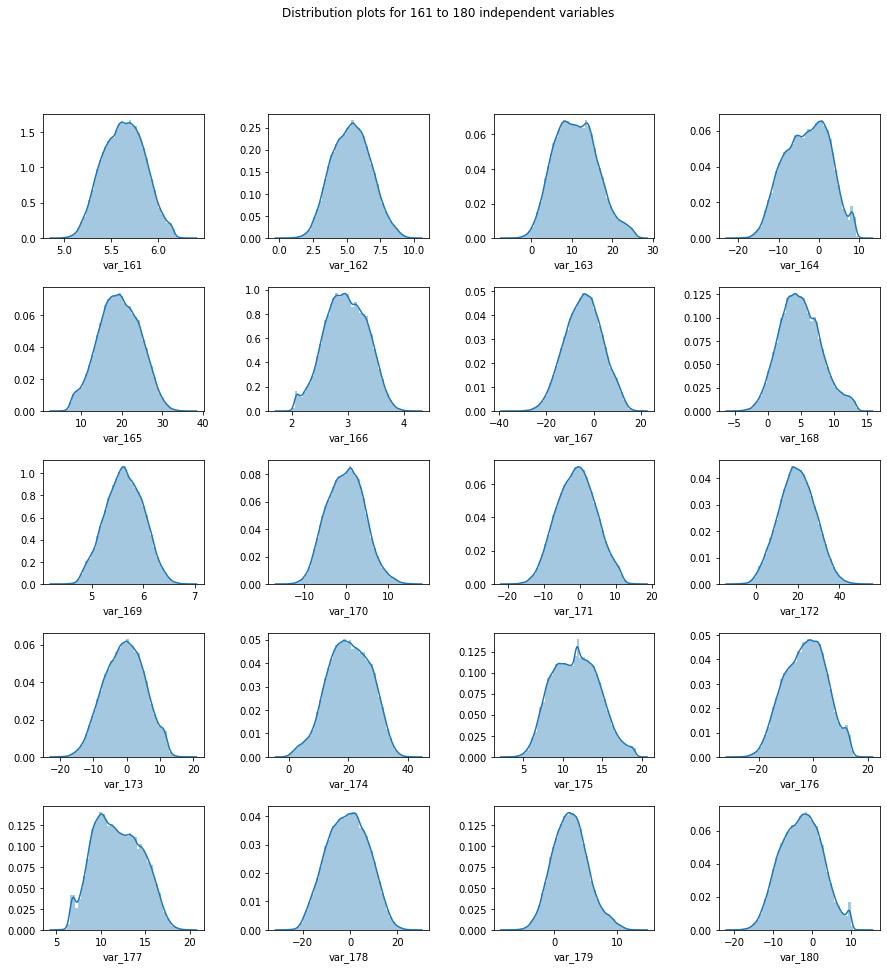

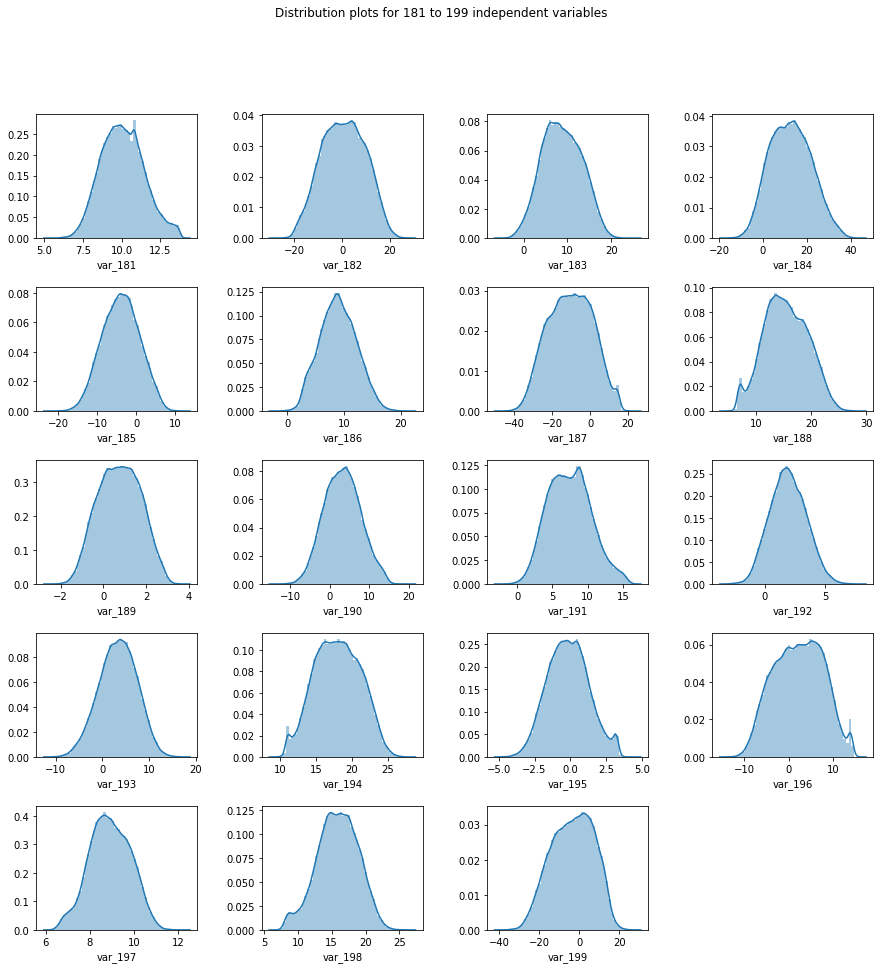

In [338]:
#distribution of test data using pair plots 
for i in range(1,199,20):
    if(i==181):
        check_distribution(test,i,i+19)
    else:
        check_distribution(test,i,i+20)

# Observation

<i>1. Almost all the independent variables of the test data are normally distributed.</i><br/>
<i>2. The distribution of test data is very similar to train data.</i>

# Outlier Analysis

In [339]:
#Box plot for checking outliers in the dataset
def box_plot(df,start,end):
  selected_var = df.columns.values
  fig = plt.figure(figsize=(15,15))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)
  if(start >=0 and end<=len(selected_var)):
    for i , realindex in  enumerate(selected_var[start:end],1):
      ax = fig.add_subplot( 5,4, i)
      sns.boxplot(y=X.loc[:,realindex],x=Y ,ax=ax)
      plt.suptitle("Box plots for {0} to {1} independent variables".format(start,end-1))   
  plt.show()

## <i>Outlier Analysis for the train data</i>

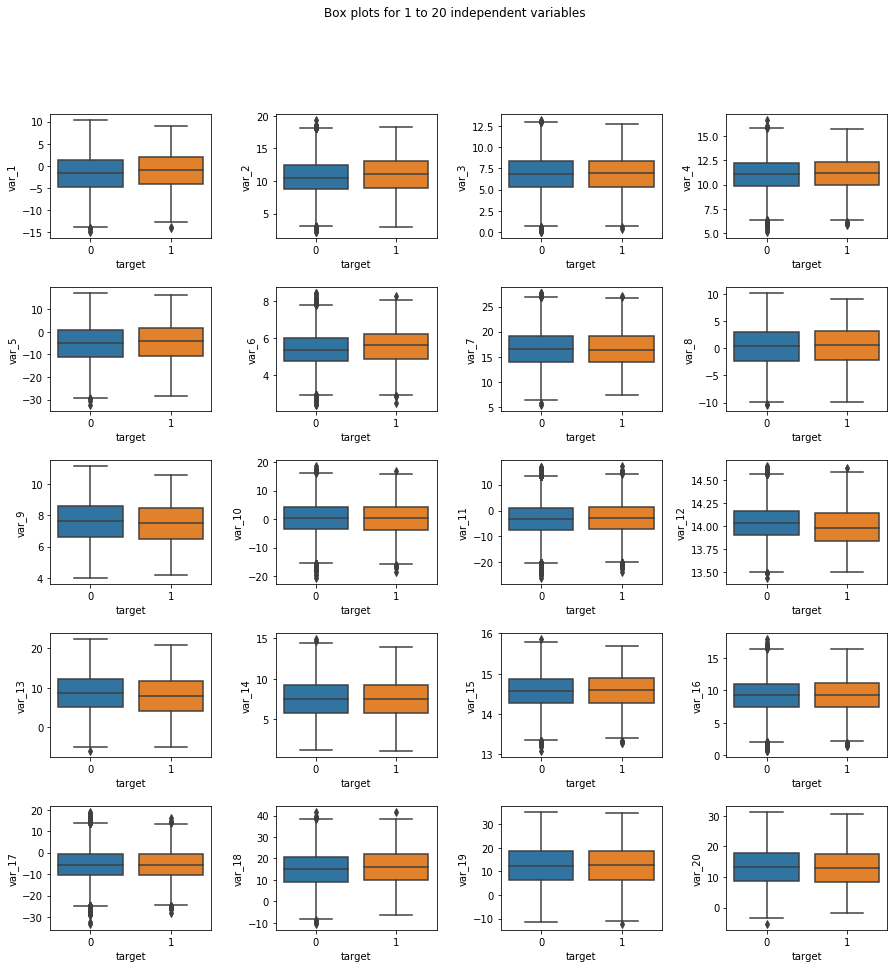

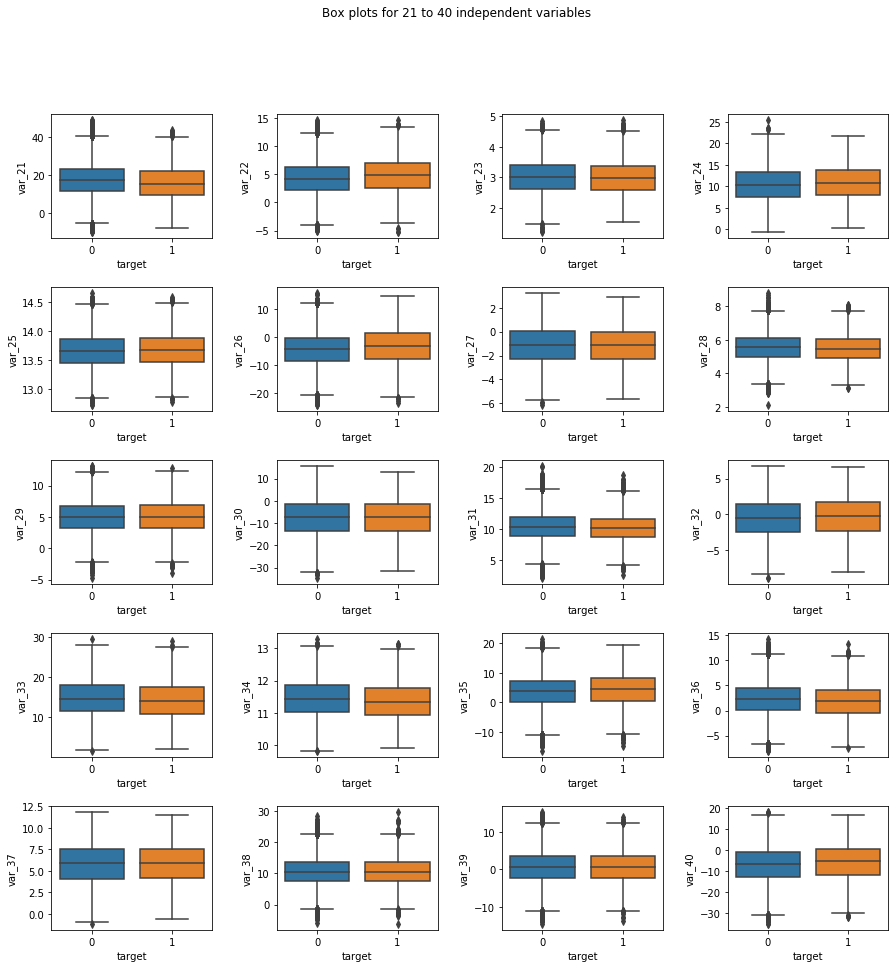

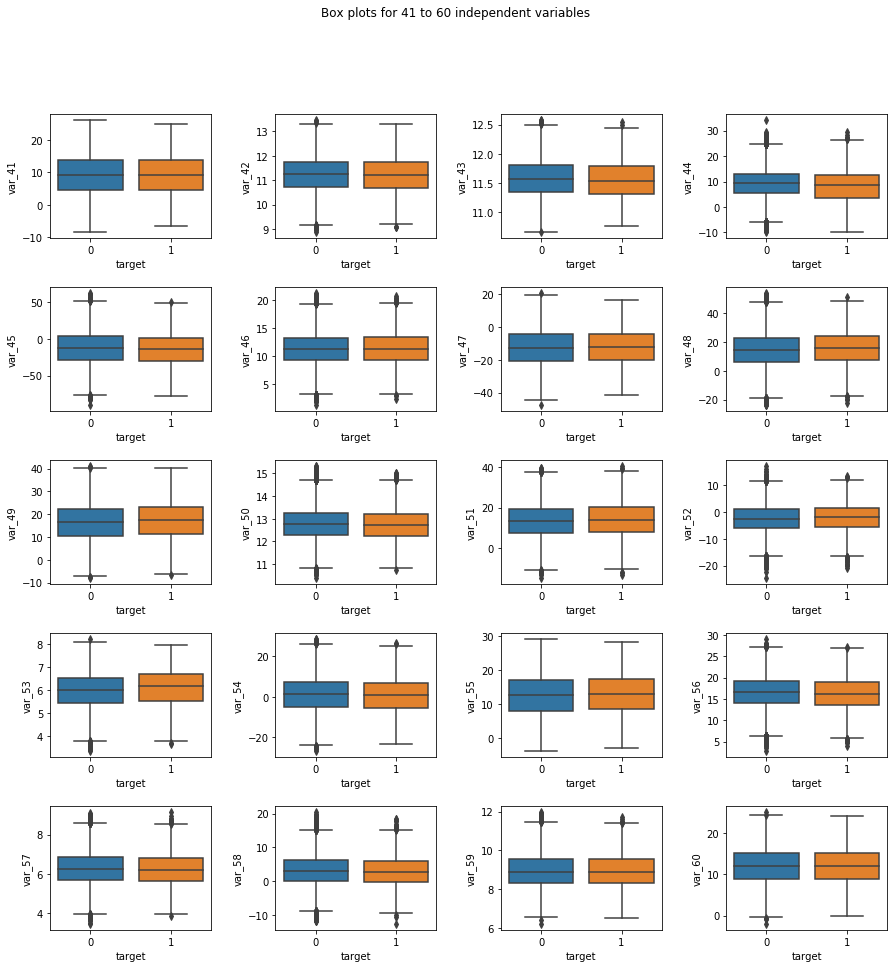

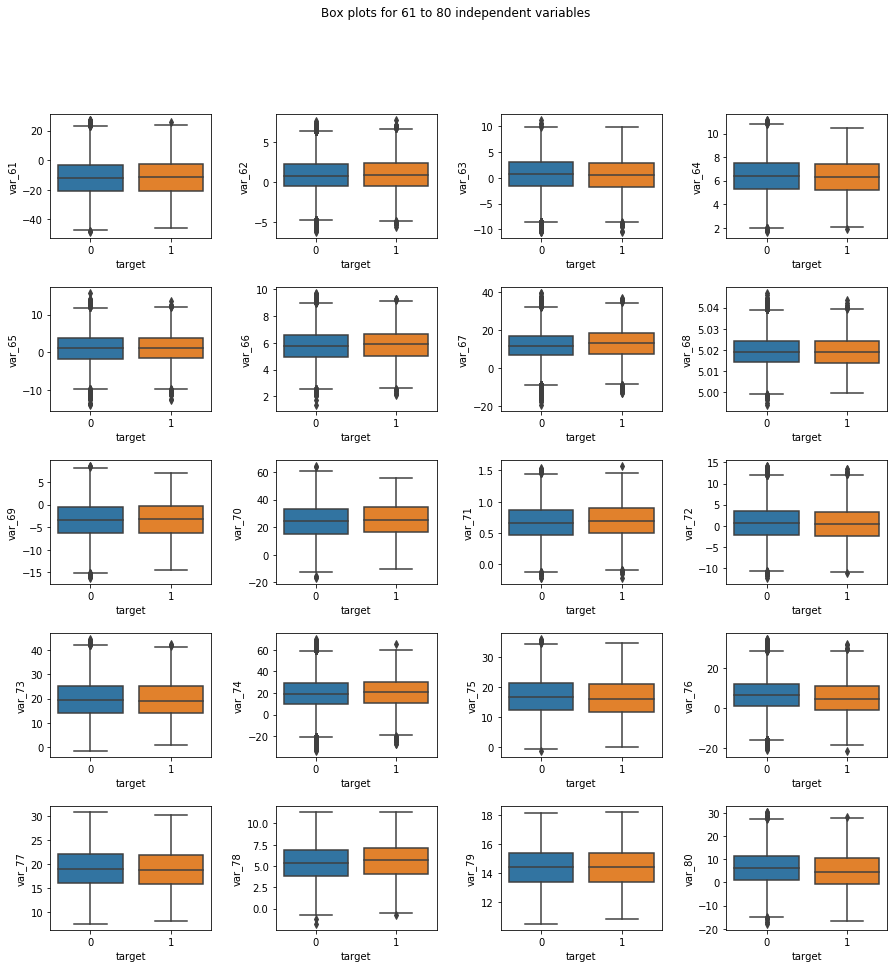

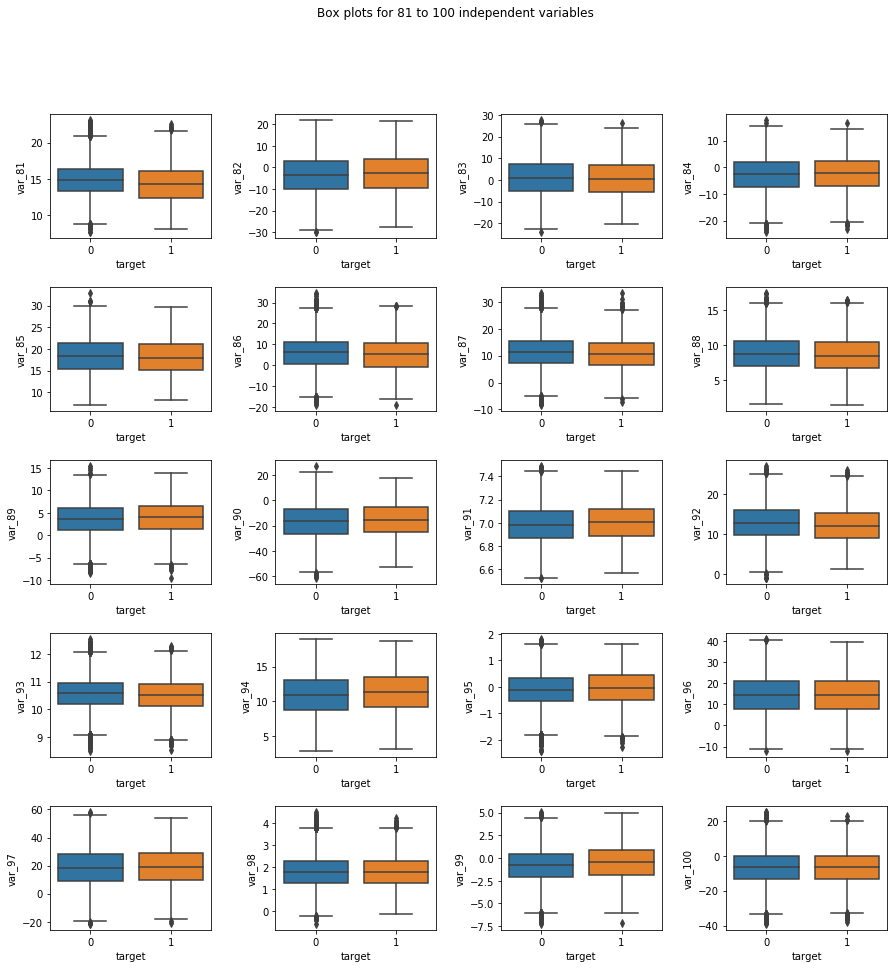

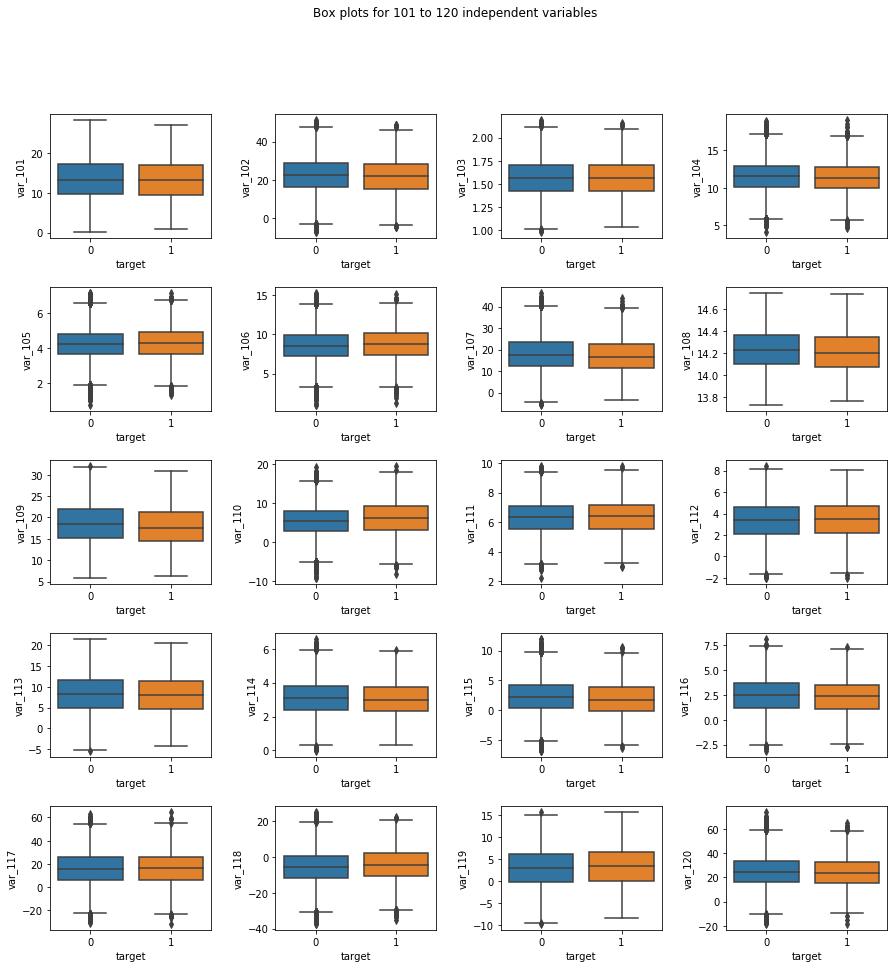

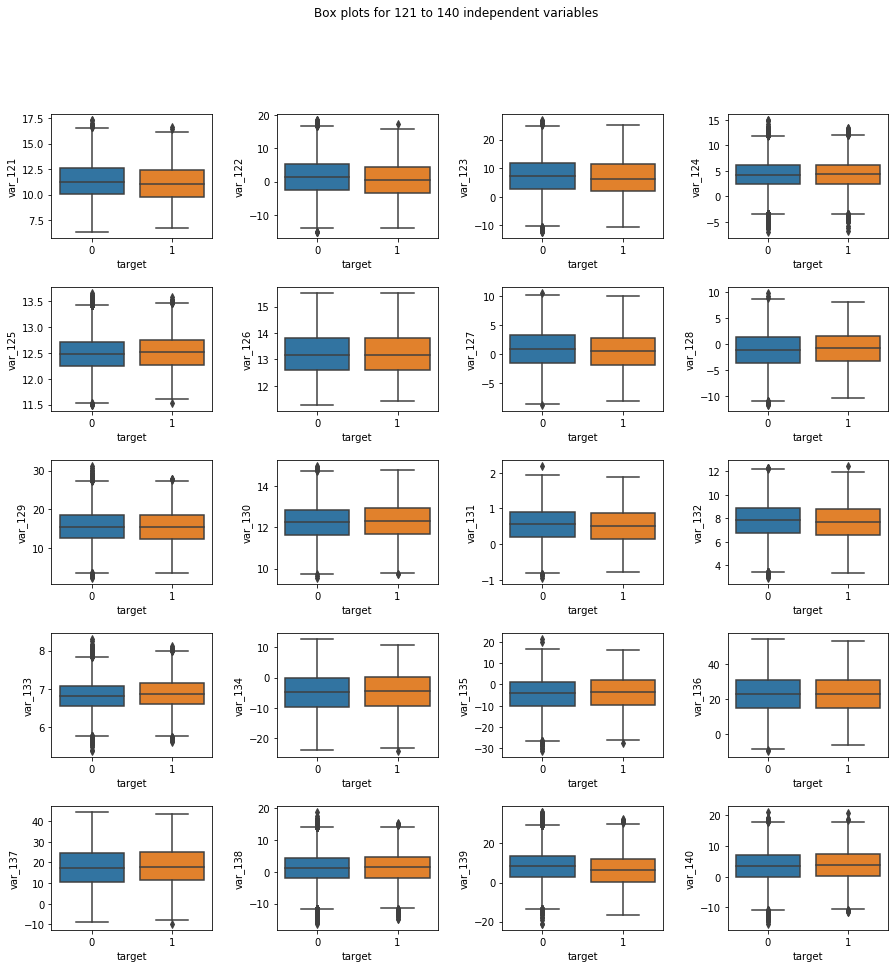

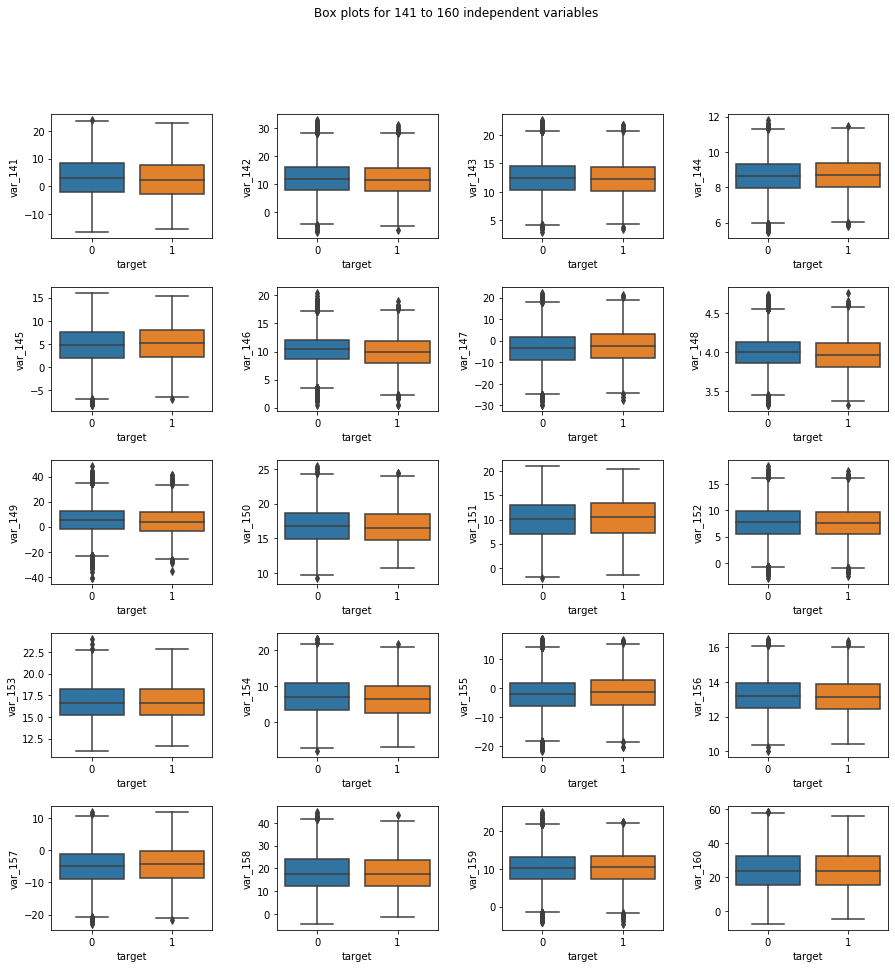

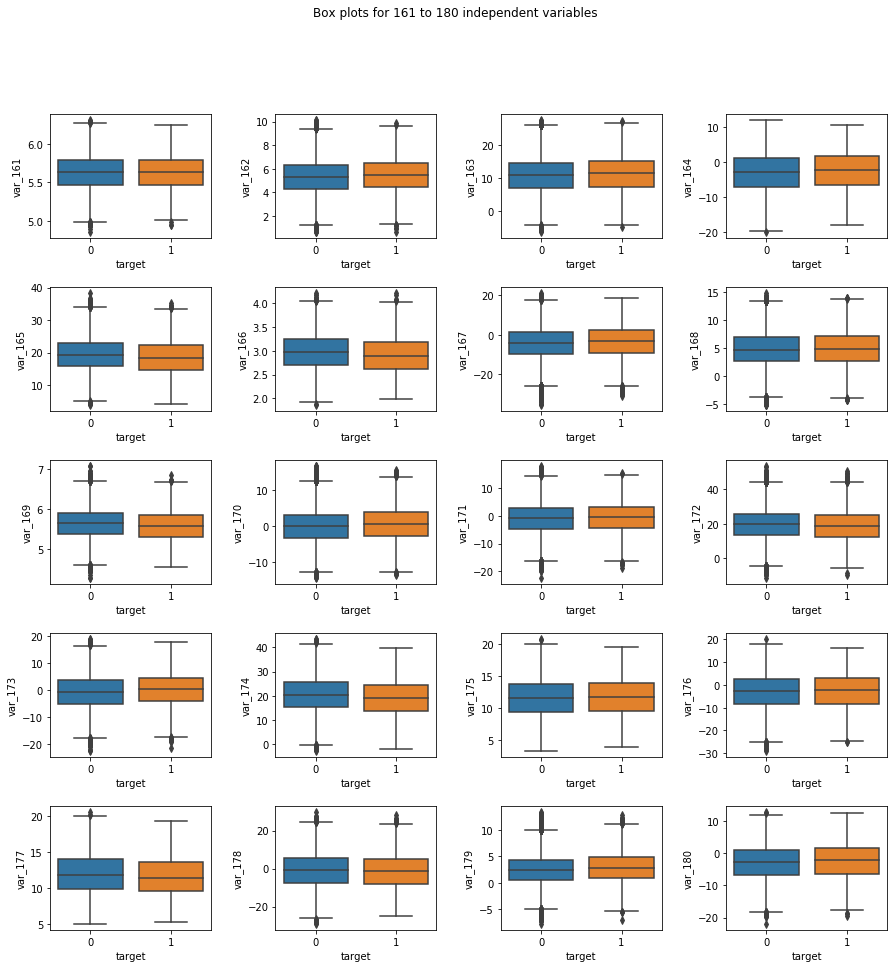

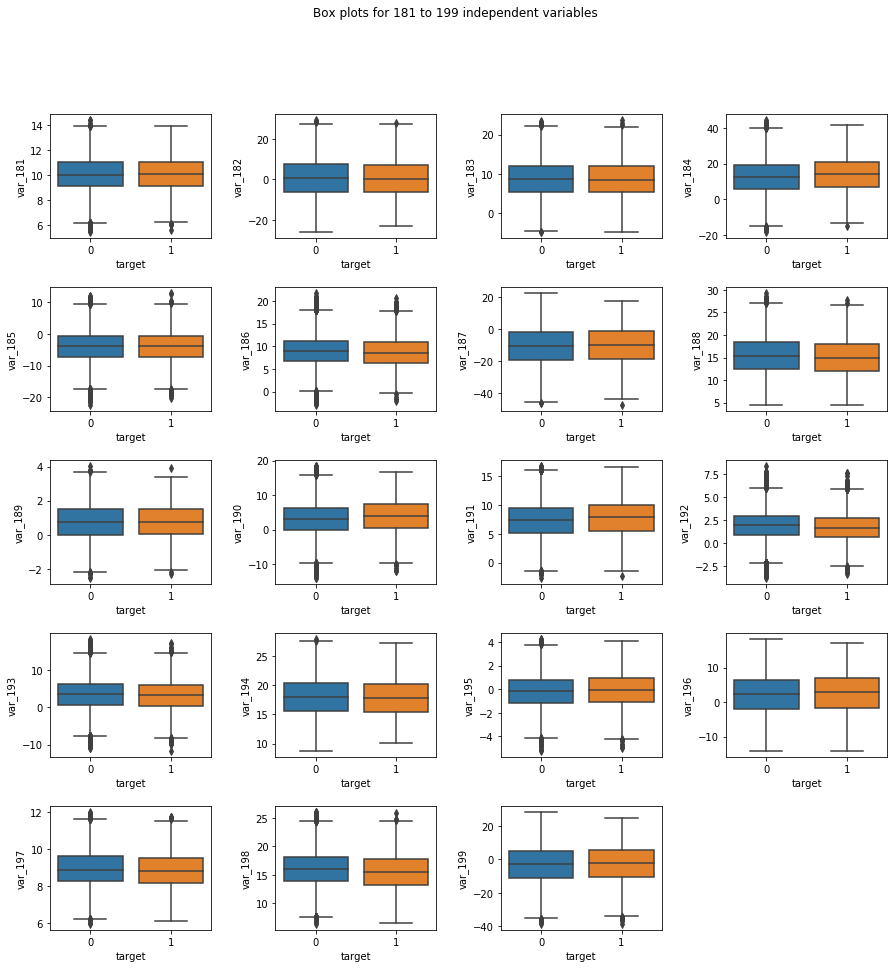

In [340]:
#checking the outliers in the training data
for i in range(1,199,20):
    if(i==181):
        box_plot(X,i,i+19)
    else:
        box_plot(X,i,i+20)

## <i>Outlier Analysis for the test data</i>

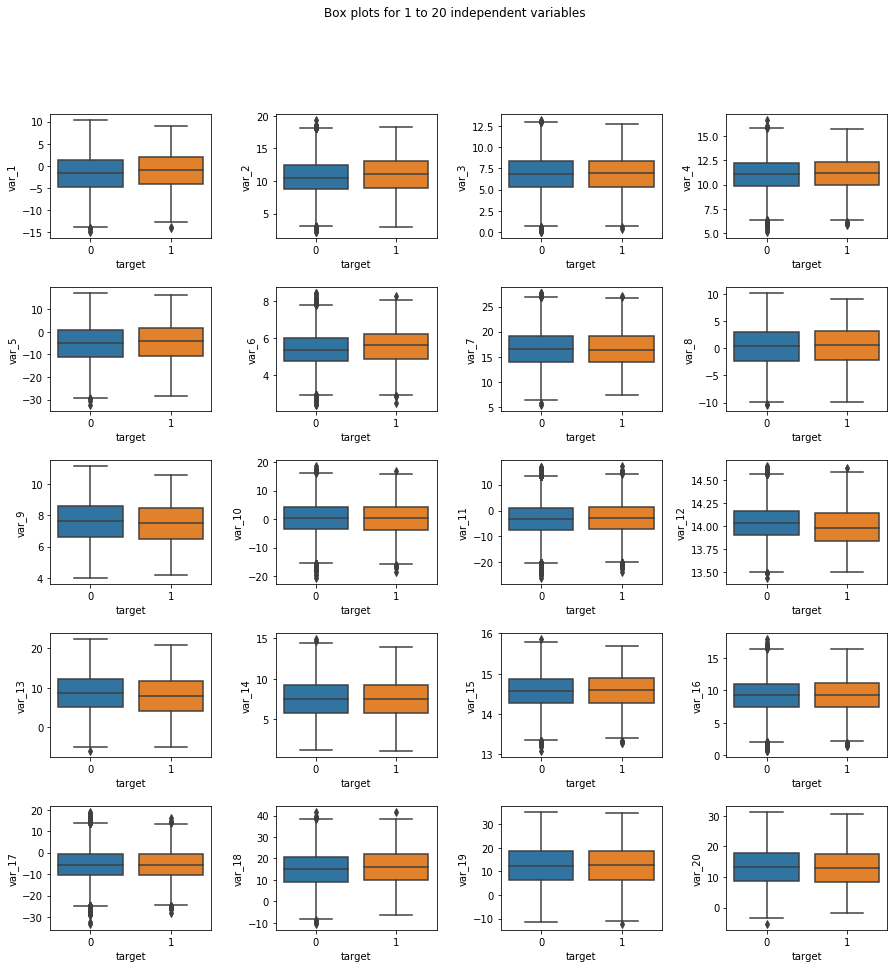

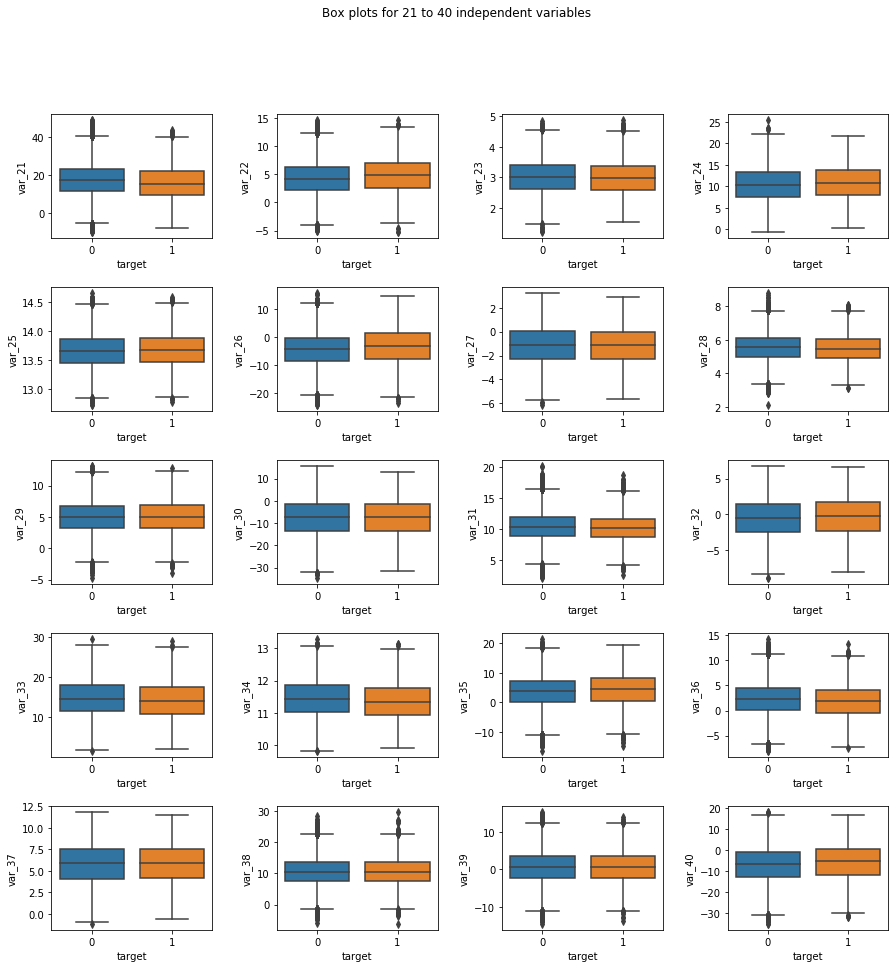

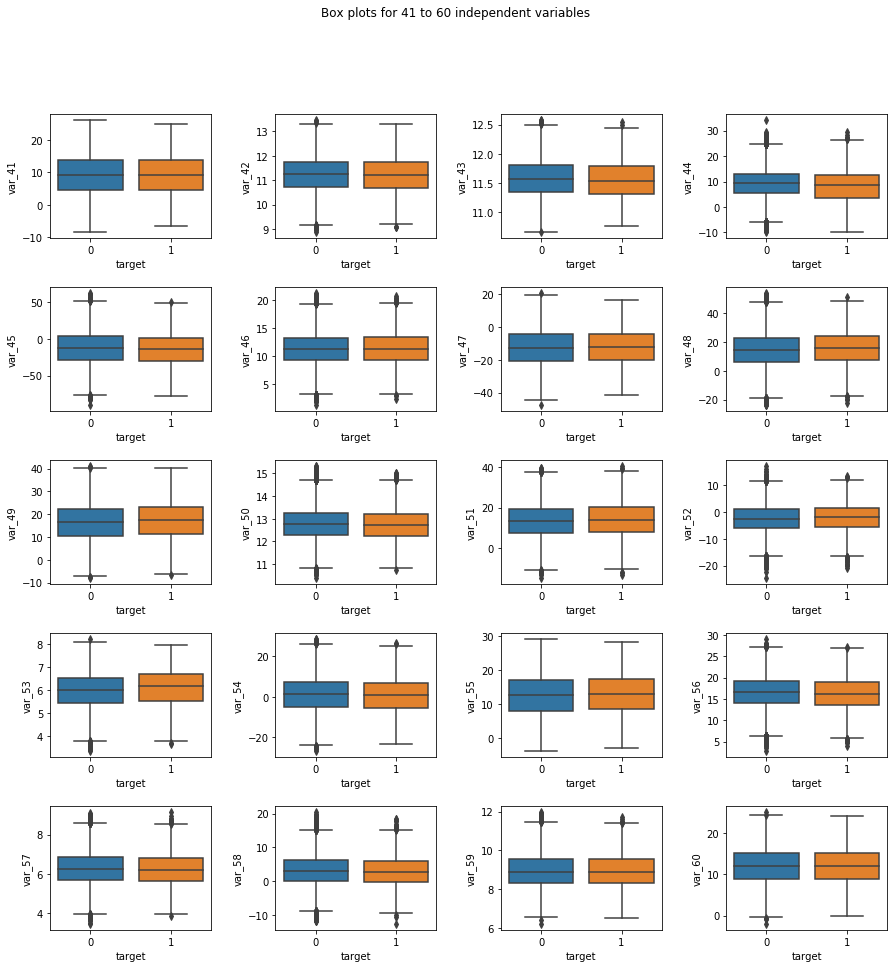

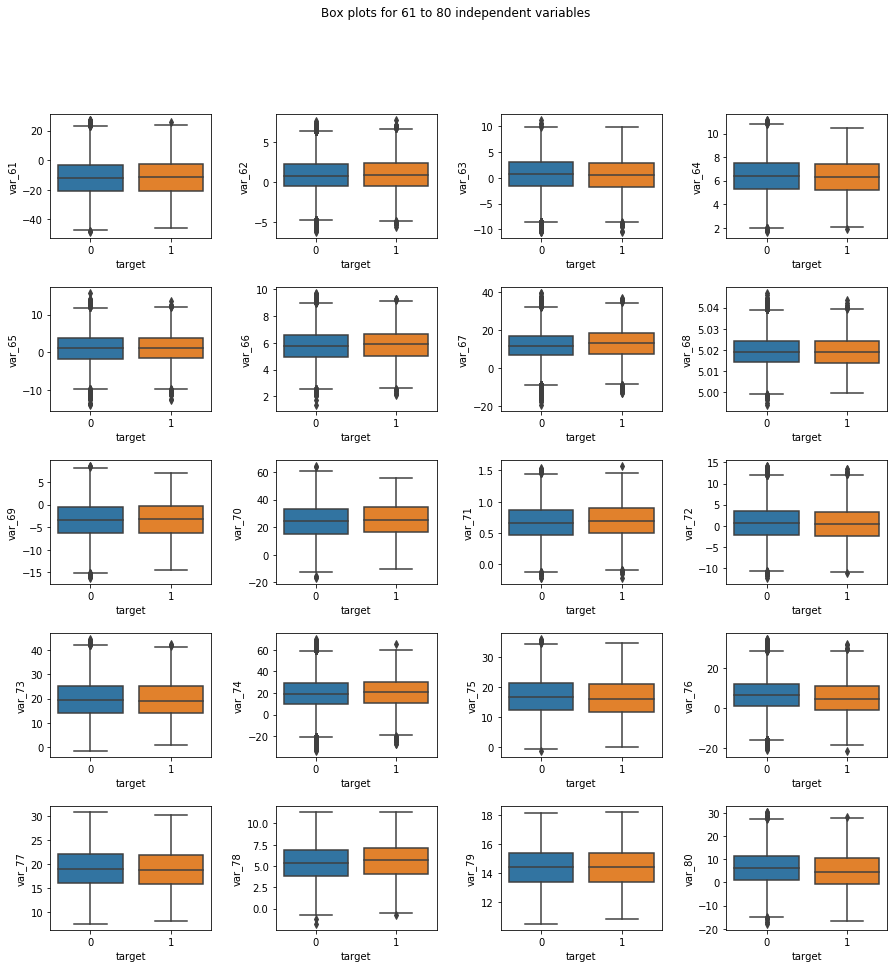

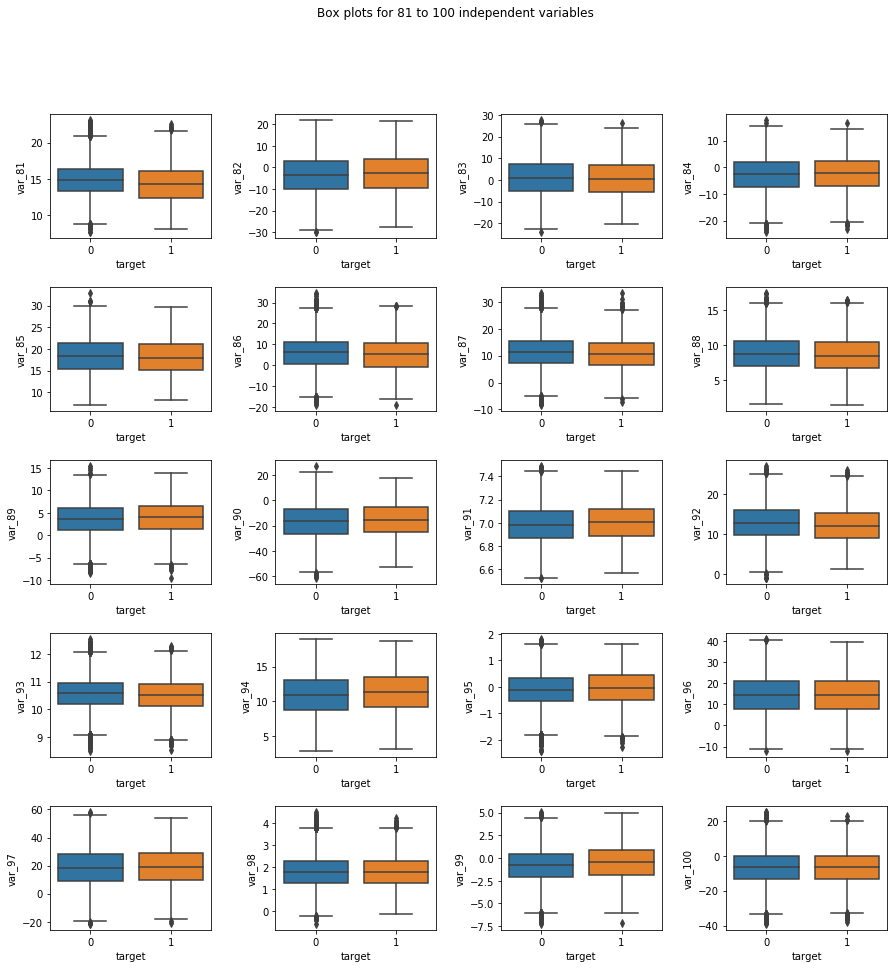

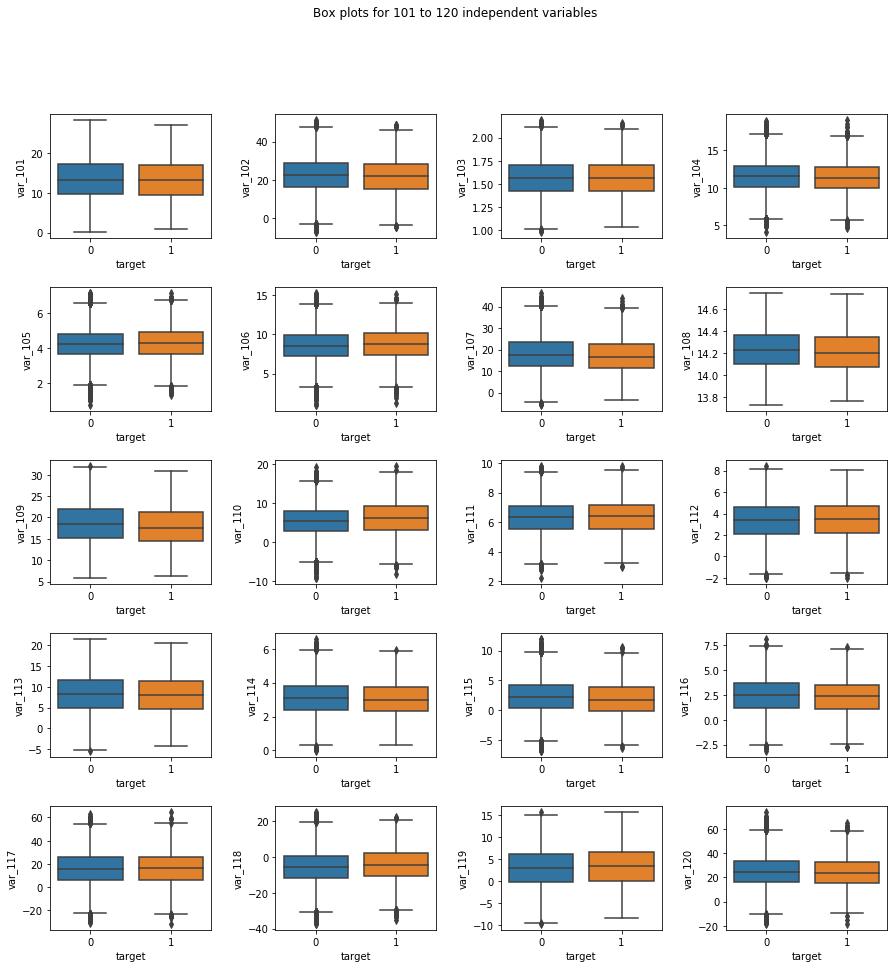

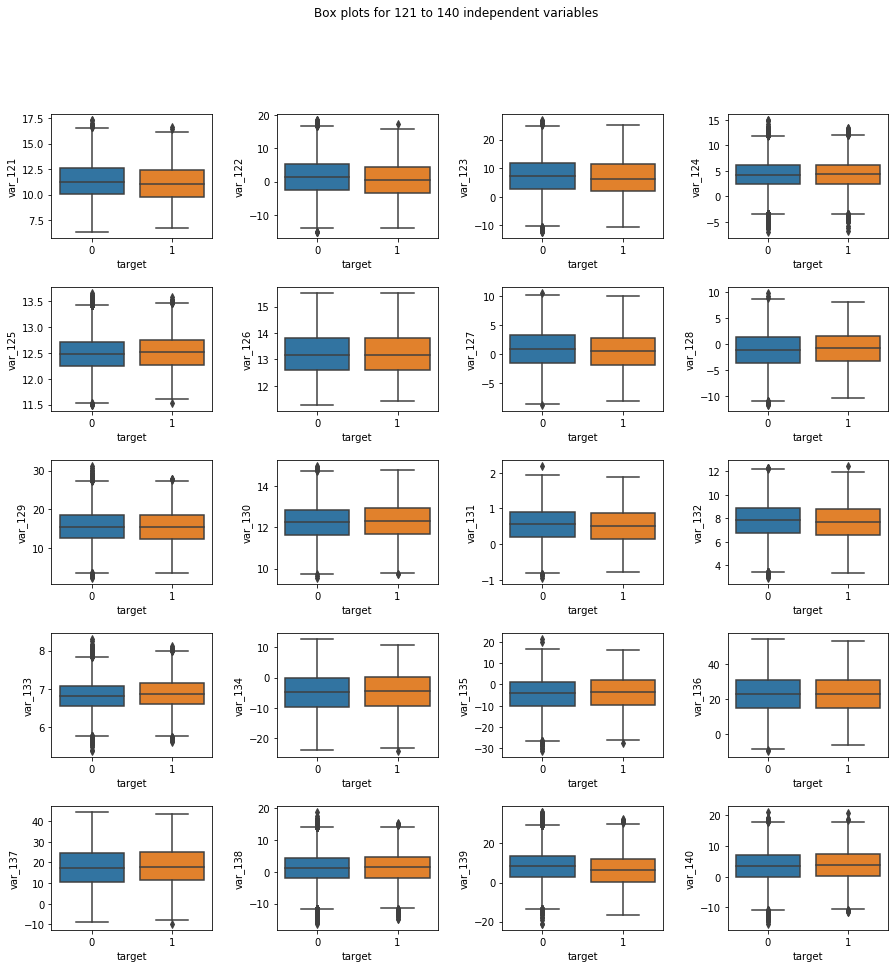

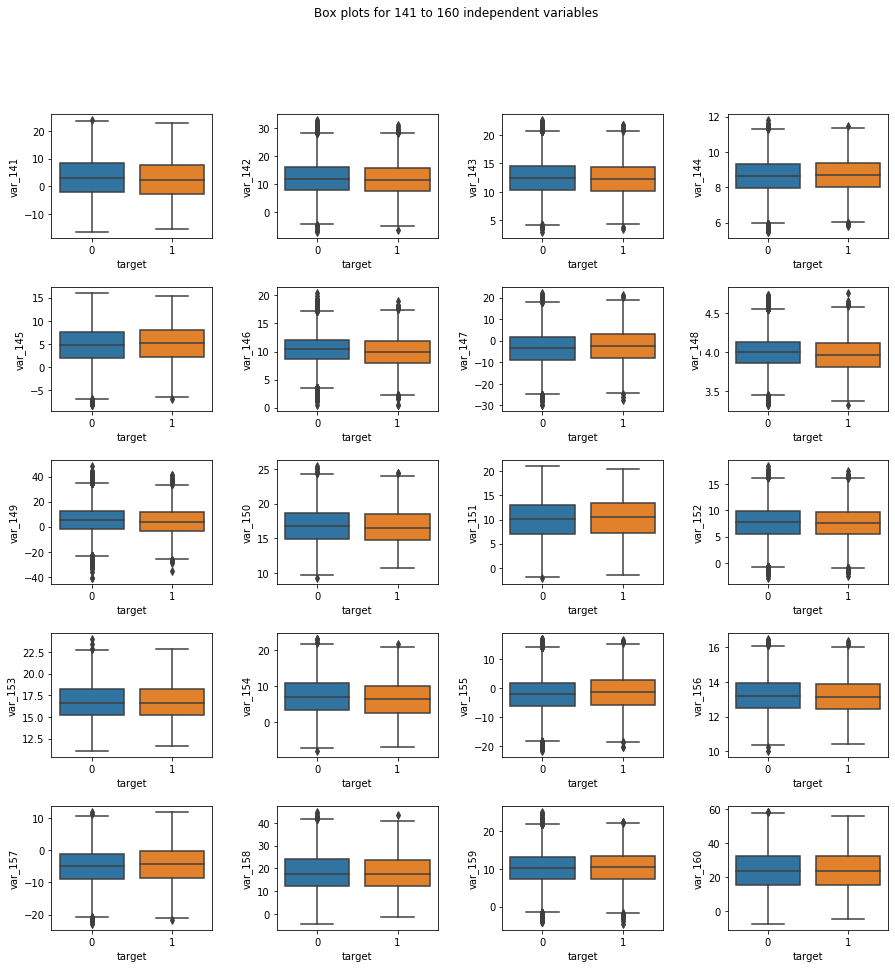

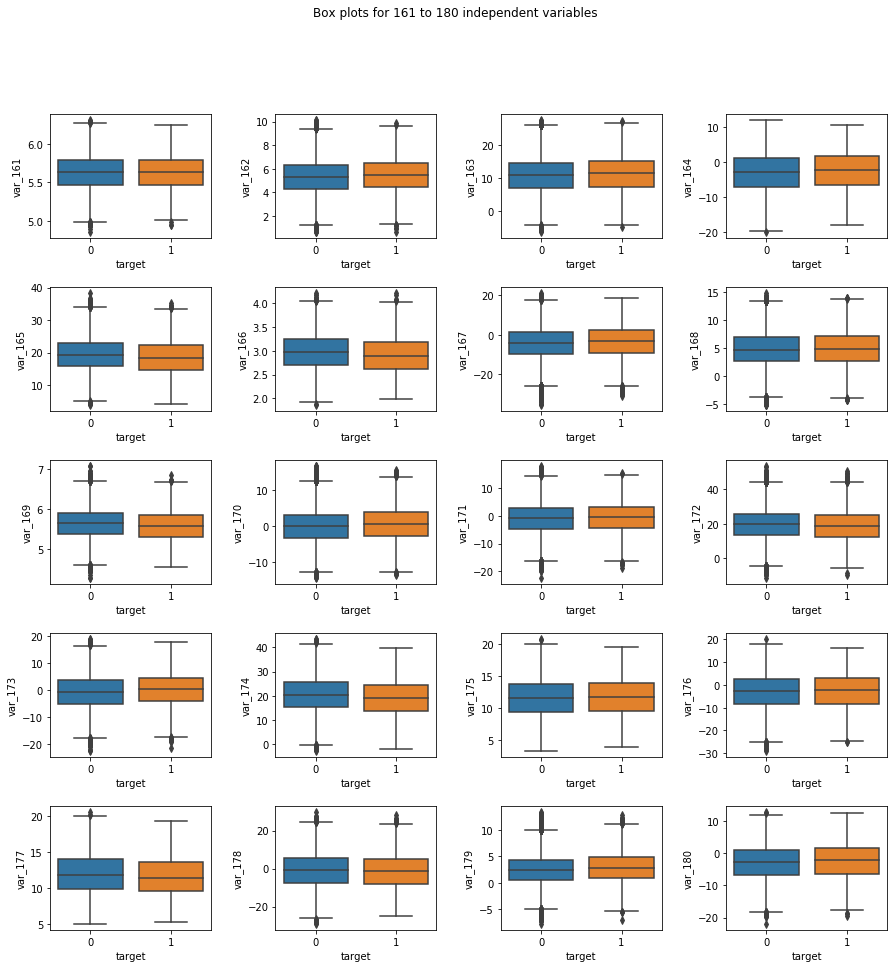

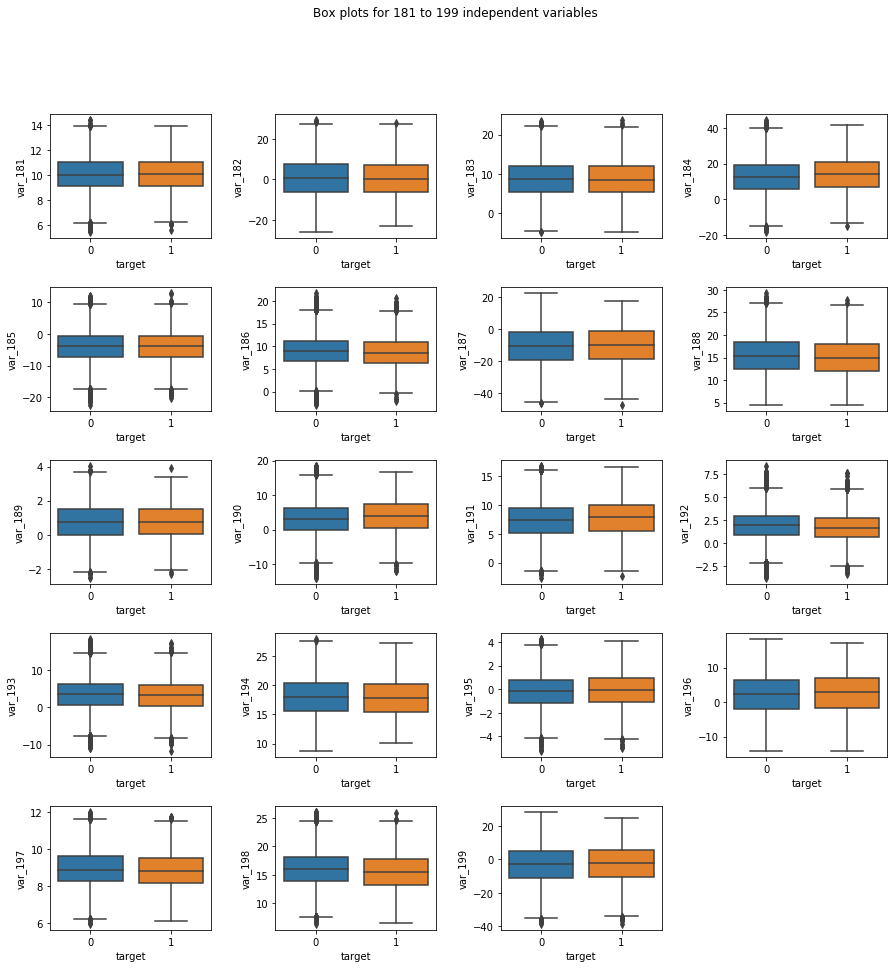

In [341]:
#checking the outliers in the test data
for i in range(1,199,20):
    if(i==181):
        box_plot(test,i,i+19)
    else:
        box_plot(test,i,i+20)

# Remove Outliers

In [342]:
#function to replace values which are below lower fence and above upper fence with NaN
def remove_outlier_fillna(data ,var_list):
    for i in var_list:
        q75 ,q25 = np.percentile(data.loc[:,i] ,[75,25])
        iqr =q75-q25
        minimum = q25 -(1.5*iqr)
        maximum =q75+(1.5*iqr)
        print(i,"iqr",iqr,"mimimum",minimum ,"maximum",maximum,sep=" : ")
        data.loc[data[i]<minimum ,i]=np.nan
        data.loc[data[i]>maximum ,i]=np.nan     
    return data

## <i>Remove Outliers from the training data</i>

In [343]:
#replace outliers with NaN for the training data
selected_var_train = X.columns.values
X = remove_outlier_fillna(X.copy() ,selected_var_train)

var_0 : iqr : 4.3043499999999995 : mimimum : 1.9973250000000018 : maximum : 19.214725
var_1 : iqr : 6.09865 : mimimum : -13.888000000000002 : maximum : 10.5066
var_2 : iqr : 3.794225000000001 : mimimum : 3.031137499999998 : maximum : 18.208037500000003
var_3 : iqr : 3.0700249999999993 : mimimum : 0.6490375000000013 : maximum : 12.9291375
var_4 : iqr : 2.377950000000002 : mimimum : 6.316249999999997 : maximum : 15.828050000000005
var_5 : iqr : 12.12515 : mimimum : -29.388075 : maximum : 19.112525
var_6 : iqr : 1.2352999999999996 : mimimum : 2.91475 : maximum : 7.855949999999998
var_7 : iqr : 5.159100000000002 : mimimum : 6.205149999999996 : maximum : 26.841550000000005
var_8 : iqr : 5.2557 : mimimum : -10.20135 : maximum : 10.821449999999999
var_9 : iqr : 1.9656249999999993 : mimimum : 3.6703625000000013 : maximum : 11.532862499999998
var_10 : iqr : 7.977875000000001 : mimimum : -15.561762500000002 : maximum : 16.349737500000003
var_11 : iqr : 8.363425 : mimimum : -20.0557375 : maximum 

var_99 : iqr : 2.6346999999999996 : mimimum : -6.058249999999999 : maximum : 4.480549999999999
var_100 : iqr : 13.3308 : mimimum : -33.194900000000004 : maximum : 20.128300000000003
var_101 : iqr : 7.610425000000001 : mimimum : -1.7758375000000033 : maximum : 28.665862500000003
var_102 : iqr : 12.634250000000005 : mimimum : -2.9034000000000084 : maximum : 47.63360000000001
var_103 : iqr : 0.27649999999999997 : mimimum : 1.01415 : maximum : 2.1201499999999998
var_104 : iqr : 2.8042000000000016 : mimimum : 5.891599999999997 : maximum : 17.108400000000003
var_105 : iqr : 1.1825999999999994 : mimimum : 1.865700000000001 : maximum : 6.596099999999999
var_106 : iqr : 2.6466000000000003 : mimimum : 3.3124 : maximum : 13.898800000000001
var_107 : iqr : 11.180525 : mimimum : -4.6027124999999955 : maximum : 40.1193875
var_108 : iqr : 0.26290000000000013 : mimimum : 13.704550000000001 : maximum : 14.756150000000002
var_109 : iqr : 6.745725 : mimimum : 4.988587500000001 : maximum : 31.971487500000

## <i>Remove Outliers from the test data<i>

In [344]:
#replace outliers with NaN for the test data
selected_var_test = test.columns.values
test = remove_outlier_fillna(test.copy() ,selected_var_test)

var_0 : iqr : 4.296624999999999 : mimimum : 1.9980375000000024 : maximum : 19.184537499999998
var_1 : iqr : 6.043525 : mimimum : -13.7654125 : maximum : 10.4086875
var_2 : iqr : 3.7594250000000002 : mimimum : 3.0964624999999995 : maximum : 18.134162500000002
var_3 : iqr : 3.0971 : mimimum : 0.5848500000000003 : maximum : 12.97325
var_4 : iqr : 2.3623250000000002 : mimimum : 6.347587499999999 : maximum : 15.7968875
var_5 : iqr : 12.143975 : mimimum : -29.4173625 : maximum : 19.1585375
var_6 : iqr : 1.2332 : mimimum : 2.9227999999999996 : maximum : 7.8556
var_7 : iqr : 5.160650000000002 : mimimum : 6.192924999999996 : maximum : 26.835525000000004
var_8 : iqr : 5.233925 : mimimum : -10.154787500000001 : maximum : 10.780912500000001
var_9 : iqr : 1.9610249999999985 : mimimum : 3.6822625000000024 : maximum : 11.526362499999996
var_10 : iqr : 7.9884 : mimimum : -15.608600000000003 : maximum : 16.345000000000002
var_11 : iqr : 8.354525 : mimimum : -20.0537875 : maximum : 13.3643125
var_12 : i

var_97 : iqr : 19.2302 : mimimum : -19.893400000000003 : maximum : 57.0274
var_98 : iqr : 0.9880999999999998 : mimimum : -0.21254999999999957 : maximum : 3.7398499999999997
var_99 : iqr : 2.659125 : mimimum : -6.1083875 : maximum : 4.5281125
var_100 : iqr : 13.2932 : mimimum : -33.1906 : maximum : 19.982200000000002
var_101 : iqr : 7.630749999999997 : mimimum : -1.841724999999995 : maximum : 28.681274999999992
var_102 : iqr : 12.590875 : mimimum : -2.7570375000000027 : maximum : 47.606462500000006
var_103 : iqr : 0.27770000000000006 : mimimum : 1.01185 : maximum : 2.12265
var_104 : iqr : 2.793424999999999 : mimimum : 5.924737500000003 : maximum : 17.0984375
var_105 : iqr : 1.1799999999999997 : mimimum : 1.8717000000000006 : maximum : 6.5916999999999994
var_106 : iqr : 2.6407250000000007 : mimimum : 3.324312499999999 : maximum : 13.887212500000002
var_107 : iqr : 11.152900000000002 : mimimum : -4.508250000000004 : maximum : 40.103350000000006
var_108 : iqr : 0.26480000000000103 : mimimu

var_198 : iqr : 4.1979250000000015 : mimimum : 7.550387499999998 : maximum : 24.342087500000005
var_199 : iqr : 16.0594 : mimimum : -35.213100000000004 : maximum : 29.024500000000003


# Missing Values Imputation

In [345]:
#total missing values in train data
print(X.isnull().sum().sum())

26536


In [346]:
#total missing values in test data
print(test.isnull().sum().sum())

27091


In [347]:
#missing value percentage in train data
print(X.isnull().mean()*100)

var_0      0.0520
var_1      0.0030
var_2      0.0245
var_3      0.0110
var_4      0.0380
            ...  
var_195    0.0660
var_196    0.0000
var_197    0.0255
var_198    0.0470
var_199    0.0100
Length: 200, dtype: float64


In [348]:
#missing value percentage in test data
print(test.isnull().mean()*100)

var_0      0.0610
var_1      0.0020
var_2      0.0280
var_3      0.0065
var_4      0.0445
            ...  
var_195    0.0520
var_196    0.0000
var_197    0.0255
var_198    0.0575
var_199    0.0070
Length: 200, dtype: float64


# Standardization of train and test data

In [349]:
#function for standardizing the data
def std_data (df): 
    scaler =StandardScaler()
    return pd.DataFrame(scaler.fit_transform(df) ,columns=df.columns)

In [350]:
#train data standardization
X = std_data(X)

In [351]:
#test data standardization
test = std_data(test)

# Model Training

<i>We will use three models for training the dataset :-<br/>
1. Logistic Regression<br/>
2. Decision Tree<br/>
3. XGBoost</i>

## Generic Function

In [370]:
#function to plot roc curve 
def roc_plot(Y_true ,Y_prob ,model="model") :
  fpr, tpr, thresholds =roc_curve(Y_true, Y_prob)
  plt.plot(fpr, tpr)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.title('ROC curve for  %s'%model)
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.grid(True)
  plt.show()
  print('  AUC: %.3f' % auc(fpr,tpr))
    
#this function return a dictinary of model performance criteria
def model_accuracy(conf_matrix): 
    model_pram={}
    tn =conf_matrix.iloc[0,0]
    tp =conf_matrix.iloc[1,1]
    fp =conf_matrix.iloc[0,1]
    fn =conf_matrix.iloc[1,0]
    model_pram['precision'] =(tp)/(tp+fp)
    model_pram['accuracy']  =(tp+tn)/(tp+tn+fp+fn)
    model_pram['recall']  =(tp)/(tp+fn)
    model_pram['specificity'] =(tn)/(tn +fp)
    model_pram['fpr'] =(fp)/(fp+tn)
    model_pram['fnr'] =(fn)/(fn+tp)
    model_pram['f1'] =2*(( model_pram['precision'] *model_pram['recall'])/( model_pram['precision'] +model_pram['recall']))
    return model_pram
  
#function to calculate confusion matrix 
def run_model(model_object, X,Y,model_name):
    pred_prob = model_object.predict_proba(X)[:, 1] 
    y_pred=model_object.predict(X)
    conf =pd.crosstab(Y,y_pred)  
    print(model_accuracy(conf))
    roc_plot(Y ,pred_prob ,model_name)
    return conf

# Logistic Regression

In [371]:
#function for cleaning the dataset
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [372]:
#cleaning the training dataset
clean_dataset(X)

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
0      -0.578081 -1.273999  0.452478 -0.834272  0.234995 -0.536547 -0.335514   
2      -0.682300 -0.276197  0.517819  0.536614 -0.306937 -0.511148  1.774025   
3       0.125576 -0.129537 -0.667842  0.195288  0.928547  0.410647  0.501940   
4      -0.277686  0.035521  0.818792 -0.078027  0.738852  0.955601  0.614935   
5       0.262655 -0.170628  0.717748  0.895812 -0.072688  1.097070 -1.013828   
...          ...       ...       ...       ...       ...       ...       ...   
199993  0.835792 -1.030587 -0.374563 -0.100796  0.852398 -0.267141  0.760775   
199994  0.564632 -1.050713  0.196342 -1.406805 -0.388147  2.008397  1.898469   
199995  0.266511  0.279452 -0.929360 -1.607311 -0.456336  2.120562  0.303130   
199997  0.179234 -0.845675 -0.076395 -0.563698 -1.073060 -0.043726 -0.986881   
199999  0.064864 -1.008337  0.532146  0.605163  0.294853  0.688536 -0.144453   

           var_7     var_8     var_9  ...   var_190   var_191   var_192  \
0       0.609234 -1.561685 -1.473796  ...  0.262711 -1.150284  0.834197   
2      -0.564751 -1.561474 -1.307408  ... -0.073903  0.779815 -0.172796   
3      -0.474165 -1.844028  0.548767  ...  0.269576 -0.892189 -0.827136   
4       0.792103  1.794804  0.090006  ... -1.041296  0.690669 -1.423776   
5      -0.386214  0.990626 -1.285952  ... -2.101132 -0.276285  2.314325   
...          ...       ...       ...  ...       ...       ...       ...   
199993 -1.040889  1.358701  0.839682  ...  0.152751  0.466331 -0.077180   
199994  0.629780 -0.234621 -1.194783  ... -0.407194 -0.188100  1.275460   
199995 -0.407843 -0.271621 -1.538651  ...  0.638141  1.919396  1.420602   
199997  1.466945 -0.049233 -1.137053  ...  0.181225 -0.660927  0.811392   
199999 -0.391980 -0.221568  1.458677  ...  1.263683 -1.903898 -1.232543   

         var_193   var_194   var_195   var_196   var_197   var_198   var_199  
0      -0.418282  0.168743 -1.583755  1.022131 -0.373885 -1.027885  0.213914  
2      -0.419596  1.151672  2.301881 -1.617906 -0.695398 -0.381763  0.356526  
3      -0.486450  1.607970 -0.793090 -0.959020  1.503813  0.698766 -0.544070  
4       1.478913 -1.501136 -0.962488  0.297627  0.646700  0.707982 -0.525936  
5      -0.734523 -0.972399  0.821629 -1.086734  0.933346 -1.094231 -0.137733  
...          ...       ...       ...       ...       ...       ...       ...  
199993 -2.067479  1.279519  0.372846  0.811620  0.068629 -0.442220  0.904623  
199994  0.756668 -1.125380 -0.942988 -1.142800  0.226670  0.148869 -0.400797  
199995 -0.608476  0.009956 -1.160155 -0.025161 -0.407449  0.264990 -1.393905  
199997  0.387884  1.766310 -1.005627 -0.187031 -0.208784 -0.677657  0.721036  
199999 -0.750629 -0.887901 -1.648919 -0.831910 -0.784248 -1.244789  0.331797  

[175104 rows x 200 columns]

In [373]:
#creating the subset of target variable
y=Y.head(175104)
y

0         0
1         0
2         0
3         0
4         0
         ..
175099    0
175100    0
175101    0
175102    0
175103    0
Name: target, Length: 175104, dtype: int64

{'precision': 0.10946542073807039, 'accuracy': 0.5236488029970761, 'recall': 0.5261328013679111, 'specificity': 0.5233721970817281, 'fpr': 0.4766278029182719, 'fnr': 0.4738671986320889, 'f1': 0.18122564369361852}


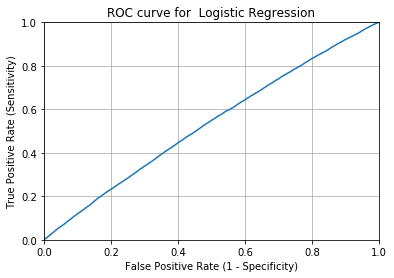

  AUC: 0.533


In [374]:
#applying logistic regression for imbalanced dataset
logit_model =LogisticRegression(class_weight='balanced' , random_state=5)
logit_model.fit(X,y)
confMatrix=run_model(logit_model , X,y ,"Logistic Regression")

# Observations 

<table>
<tr>
     <th><i>Evaluation Metrics</i></th>
     <th><i>Percentage Values</i></th>
 </tr> 
  <tr>
     <td>Accuracy</td>
     <td>52.36%</td>
 </tr> 
 <tr>
     <td>Recall</td>
     <td>52.61%</td>
 </tr>
 <tr>
     <td>Precision</td>
     <td>10.94%</td>
 </tr>
 <tr>
     <td>Specificity</td>
     <td>52.33%</td>
 </tr>
 <tr>
     <td>FPR</td>
     <td>47.66%</td>
 </tr> 
 <tr>
     <td>FNR</td>
     <td>47.38%</td>
 </tr> 
 <tr>
     <td>F1 Score</td>
     <td>18.12%</td>
 </tr>
 <tr>
     <td>AUC</td>
     <td>53.3%</td>
 </tr>
</table>    

# Decision Tree

{'precision': 0.12671183508721348, 'accuracy': 0.8110722770467836, 'recall': 0.15029923055001426, 'specificity': 0.8846527332618257, 'fpr': 0.11534726673817428, 'fnr': 0.8497007694499857, 'f1': 0.13750130357701532}


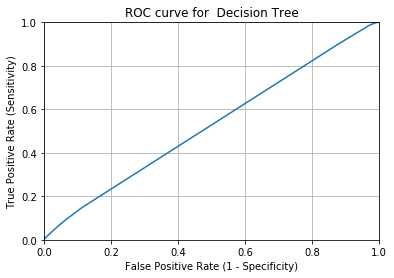

  AUC: 0.526


In [375]:
#applying decision tree for imbalanced dataset
dt_model = DecisionTreeClassifier( max_depth= 5,class_weight='balanced' ,random_state =5)
dt_model.fit(X,y)
confMatrix=run_model(dt_model,X,y,"Decision Tree")

# Observations

<table>
<tr>
     <th><i>Evaluation Metrics</i></th>
     <th><i>Percentage Values</i></th>
 </tr> 
  <tr>
     <td>Accuracy</td>
     <td>81.10%</td>
 </tr> 
 <tr>
     <td>Recall</td>
     <td>15.02%</td>
 </tr>
 <tr>
     <td>Precision</td>
     <td>12.67%</td>
 </tr>
 <tr>
     <td>Specificity</td>
     <td>88.46%</td>
 </tr>
 <tr>
     <td>FPR</td>
     <td>11.53%</td>
 </tr> 
 <tr>
     <td>FNR</td>
     <td>84.97%</td>
 </tr> 
 <tr>
     <td>F1 Score</td>
     <td>13.75%</td>
 </tr>
 <tr>
     <td>AUC</td>
     <td>52.60%</td>
 </tr>
</table>    

# XGBoost

{'precision': 0.9995332827723004, 'accuracy': 0.9976014254385965, 'recall': 0.9765175263607866, 'specificity': 0.9999492253695441, 'fpr': 5.077463045589271e-05, 'fnr': 0.02348247363921345, 'f1': 0.9878913682753848}


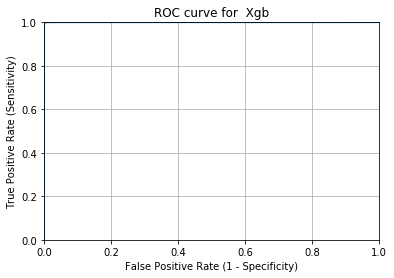

  AUC: 1.000


In [381]:
#applying xgboost on the training dataset
xgb = XGBClassifier(eta=1,n_estimators=500,max_depth=5)
xgb.fit(X,y)
confMatrix=run_model(xgb, X,y,"Xgb")

# Observations

<table>
<tr>
     <th><i>Evaluation Metrics</i></th>
     <th><i>Percentage Values</i></th>
 </tr> 
  <tr>
     <td>Accuracy</td>
     <td>99.76%</td>
 </tr> 
 <tr>
     <td>Recall</td>
     <td>97.65%</td>
 </tr>
 <tr>
     <td>Precision</td>
     <td>99.95%</td>
 </tr>
 <tr>
     <td>Specificity</td>
     <td>99.99%</td>
 </tr>
 <tr>
     <td>FPR</td>
     <td>0.005%</td>
 </tr> 
 <tr>
     <td>FNR</td>
     <td>2.34%</td>
 </tr> 
 <tr>
     <td>F1 Score</td>
     <td>98.78%</td>
 </tr>
 <tr>
     <td>AUC</td>
     <td>100%</td>
 </tr>
</table>    

# Comparing all the three models

<table>
<tr>
    <th></th>
    <th>Accuracy</th>
    <th>Recall</th>
    <th>Precision</th>
    <th>Specificity</th>
    <th>FPR</th>
    <th>FNR</th>
    <th>F1 Score</th>
    <th>AUC</th>
</tr>
    <tr></tr>
<tr>
    <th>Logistic Regression</th>
    <td>0.5236</td>
    <td>0.5261</td>
    <td>0.1094</td>
    <td>0.5233</td>
    <td>0.4766</td>
    <td>0.4738</td>
    <td>0.1812</td>
    <td>0.533</td>
</tr>
    <tr></tr>
<tr>
    <th>Decision Tree</th>
    <td>0.811</td>
    <td>0.1502</td>
    <td>0.1267</td>
    <td>0.8846</td>
    <td>0.1153</td>
    <td>0.8497</td>
    <td>0.1375</td>
    <td>0.526</td>
</tr>
    <tr></tr>
<tr>
    <th>XGBoost</th>
    <td>0.9976</td>
    <td>0.9765</td>
    <td>0.9995</td>
    <td>0.9999</td>
    <td>0.00005</td>
    <td>0.0234</td>
    <td>0.9878</td>
    <td>1.000</td>
</tr>
</table>

# Model Selection

<i>The model should be selected based on the following parameters :-<br/>
1. High Accuracy<br/>
2. High F1 Score<br/>
3. High AUC Score<br/>
4. Low FPR<br/>
5. Low FNR</i>

# Freezed Model

<i>Since XGBoost performs better than others models based on the above parameters, we will use XGBoost model for the test data.</i>

In [389]:
#applying xgboost model on the test data and store the final result in a csv
ypred=xgb.predict(test)
test_df = pd.DataFrame({"ID_code":test_ID_code})
test_df["target"] = ypred
test_df.to_csv("santander_prediction_test.csv", index=False)